# Научно исследовательская работа по анализу ESG-инвестирования
#### Выполнил Менейлюк Андрей

In [1]:
import sys

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import time
from tqdm.autonotebook import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import yfinance as yf
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import datetime
import requests_cache

#### Парсинг исторических данных с yahoo и преобразование данных из таблиц рейтинга

In [2]:
def get_info(ticker_obj):
    info_keys = ['shortName', 'industry', 'marketCap']
    info_values = []
    for key in info_keys:
        info_values.append(ticker_obj.info.get(key, None))
    return dict(zip(info_keys, info_values))

In [3]:
import requests

url_link = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
r = requests.get(url_link,headers ={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})
trending = pd.read_html(r.text)[0]

In [319]:
esg = pd.read_excel('esgrate.xlsx')
esg.Industry = esg.Industry.map(lambda x: " ".join(str(x).split()[:1]))
esg.Industry = esg.Industry.map(lambda x: " ".join(str(x).split('/')[:1]))
esg.Industry = esg.Industry.map(lambda x: " ".join(str(x).split('-')[:1]))


In [320]:
import re
esg['ESG Score'] = esg['ESG Score'].apply(lambda x: re.sub(r'[^0-9]', '', x))
esg['ESG Score'] = esg['ESG Score'].astype(int)/100


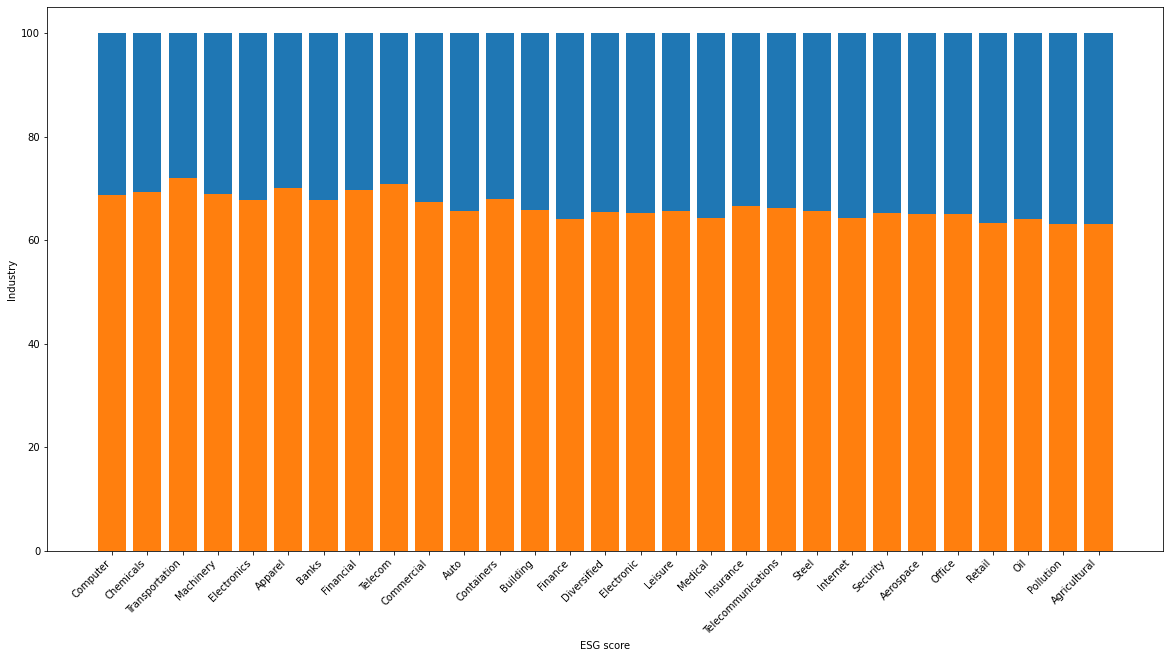

In [321]:
import numpy as np
import matplotlib.pyplot as plt

temp_vec = []
x = esg.Industry.unique()

for i in x:
    mean_esg = esg[esg['Industry'] == i]['ESG Score'].mean()
    temp_vec.append(mean_esg)

y1 = np.repeat(100,len(x))
y2 = temp_vec

fig, ax = plt.subplots()

ax.bar(x, y1)
ax.bar(x, y2)

fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(10)    #  высота Figure
plt.xlabel("ESG score")
plt.ylabel("Industry")
plt.xticks(rotation=45, ha='right')
plt.show()

In [322]:
tickers = esg['Symbol']

In [323]:
#full_ticker_data = []

#for ticker in tqdm(tickers):
#    try:
#        ticker_obj = yf.Ticker(ticker)
#        info = get_info(ticker_obj)
#        full_ticker_data.append(info)
#    except:
#        continue
        
#full_ticker_df = pd.DataFrame(full_ticker_data)

In [324]:
#full_ticker_df

In [325]:
#sorted_df = full_ticker_df.sort_values(by = 'marketCap',ascending=False)

In [326]:
#sorted_df.to_csv('marketCap.csv')

In [327]:
sorted_df = pd.read_csv('marketCap.csv')
sorted_df = sorted_df.merge(esg[['Symbol','ESG Score']],
                            left_on = 'Unnamed: 0', 
                            right_on = tickers.index)

In [328]:
fonds[['id фонда, чья структура активов','Доля, %']].groupby('id фонда, чья структура активов').sum().dropna()

,"Доля, %"
"id фонда, чья структура активов",
30.0,265.2877
31.0,2348.9124
32.0,1801.2000
33.0,56.5800
34.0,6.2100
...,...
7549.0,39.9500
7575.0,14.5000
7619.0,0.0500


In [329]:
#def get_info_name(ticker_obj):
#    info_keys = ['shortName']
#    info_values = []
#    for key in info_keys:
#        info_values.append(ticker_obj.info.get(key, None))
#    return dict(zip(info_keys, info_values))

In [330]:
#for ticker in tqdm(tickers):
#    try:
#        ticker_obj = yf.Ticker(ticker)
#        close_price = ticker_obj.history(start="2017-01-01", period='1m')['Close'].to_dict()
#        info = get_info_name(ticker_obj)
#        info.update(close_price)
#        full_ticker_data.append(info)
#    except:
#        continue
        
#full_ticker_df = pd.DataFrame(full_ticker_data)

In [331]:
full_ticker_df

In [332]:
#full_ticker_df.loc[100:].drop(['industry','marketCap'],axis = 1).T.to_csv('price_for_esg.csv')

In [333]:
price = pd.read_csv('price_for_esg.csv',header = 1,index_col = 'shortName',parse_dates = True)
price

,Microsoft Corporation,Linde plc,Accenture plc,"J.B. Hunt Transport Services, I",Xylem Inc.,Texas Instruments Incorporated,Salesforce.com Inc,"Gildan Activewear, Inc.",Metropolitan Bank Holding Corp.,IHS Markit Ltd.,...,American Tower Corporation (REI,"Sun Communities, Inc.",D/B/A Centerspace,"Hologic, Inc.",Flex Ltd.,Tractor Supply Company,"Chipotle Mexican Grill, Inc.",Zoetis Inc.,Gentherm Inc,"Ameriprise Financial, Inc."
shortName,,,,,,,,,,,,,,,,,,,,,
2015-12-31,50.206417,90.708290,94.687828,69.419571,33.897354,46.845413,78.400002,26.377647,NaN,29.678478,...,86.602112,58.645275,66.098915,38.689999,11.210000,79.240700,479.850006,46.085125,47.400002,91.335190
2016-01-04,49.591057,90.061646,92.268532,67.489136,33.507305,46.443710,76.709999,26.071354,NaN,29.058741,...,86.378807,57.335957,64.577209,37.830002,11.110000,77.618828,448.809998,45.460018,45.549999,89.472809
2016-01-05,49.817287,89.751595,92.748749,68.189392,33.498013,45.956543,77.050003,25.959976,NaN,29.265322,...,88.084930,58.670944,65.718491,37.919998,11.150000,77.563240,449.029999,46.171684,43.990002,89.120926
2016-01-06,48.912354,88.848053,92.567558,67.110619,33.080101,45.657398,76.290001,25.839323,NaN,28.852161,...,87.772308,58.268726,65.623375,38.419998,10.960000,76.497421,426.670013,46.181301,43.500000,86.091270
2016-01-07,47.211048,86.624634,89.849236,65.218063,32.225716,44.187332,74.300003,25.152504,NaN,28.429167,...,85.583801,57.601257,64.006577,37.369999,10.830000,76.441826,416.000000,44.777203,42.099998,83.362038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-14,328.339996,334.500000,369.730011,196.600006,118.680000,190.270004,255.589996,40.200001,93.629997,131.759995,...,273.410004,195.660004,104.260002,74.830002,16.719999,234.190002,1677.199951,228.070007,77.550003,292.239990
2021-12-15,334.649994,341.359985,375.299988,198.600006,119.750000,193.440002,260.040009,41.000000,96.930000,134.399994,...,274.350006,200.850006,108.269997,77.230003,16.610001,236.970001,1701.170044,232.080002,79.019997,298.239990
2021-12-16,324.899994,340.010010,400.600006,196.529999,118.639999,188.240005,253.119995,40.189999,98.519997,133.789993,...,279.470001,197.979996,107.360001,77.919998,16.730000,233.059998,1678.969971,232.809998,76.930000,300.230011


In [334]:
price = price.drop(price.loc[:,price.isna().any().values].columns,axis = 1)

In [335]:
price_m = price.resample('M').mean()

In [336]:
price

,Microsoft Corporation,Linde plc,Accenture plc,"J.B. Hunt Transport Services, I",Xylem Inc.,Texas Instruments Incorporated,Salesforce.com Inc,"Gildan Activewear, Inc.",IHS Markit Ltd.,STMicroelectronics N.V.,...,American Tower Corporation (REI,"Sun Communities, Inc.",D/B/A Centerspace,"Hologic, Inc.",Flex Ltd.,Tractor Supply Company,"Chipotle Mexican Grill, Inc.",Zoetis Inc.,Gentherm Inc,"Ameriprise Financial, Inc."
shortName,,,,,,,,,,,,,,,,,,,,,
2015-12-31,50.206417,90.708290,94.687828,69.419571,33.897354,46.845413,78.400002,26.377647,29.678478,6.071229,...,86.602112,58.645275,66.098915,38.689999,11.210000,79.240700,479.850006,46.085125,47.400002,91.335190
2016-01-04,49.591057,90.061646,92.268532,67.489136,33.507305,46.443710,76.709999,26.071354,29.058741,6.007419,...,86.378807,57.335957,64.577209,37.830002,11.110000,77.618828,448.809998,45.460018,45.549999,89.472809
2016-01-05,49.817287,89.751595,92.748749,68.189392,33.498013,45.956543,77.050003,25.959976,29.265322,5.916258,...,88.084930,58.670944,65.718491,37.919998,11.150000,77.563240,449.029999,46.171684,43.990002,89.120926
2016-01-06,48.912354,88.848053,92.567558,67.110619,33.080101,45.657398,76.290001,25.839323,28.852161,5.752172,...,87.772308,58.268726,65.623375,38.419998,10.960000,76.497421,426.670013,46.181301,43.500000,86.091270
2016-01-07,47.211048,86.624634,89.849236,65.218063,32.225716,44.187332,74.300003,25.152504,28.429167,5.688359,...,85.583801,57.601257,64.006577,37.369999,10.830000,76.441826,416.000000,44.777203,42.099998,83.362038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-14,328.339996,334.500000,369.730011,196.600006,118.680000,190.270004,255.589996,40.200001,131.759995,47.539997,...,273.410004,195.660004,104.260002,74.830002,16.719999,234.190002,1677.199951,228.070007,77.550003,292.239990
2021-12-15,334.649994,341.359985,375.299988,198.600006,119.750000,193.440002,260.040009,41.000000,134.399994,49.689999,...,274.350006,200.850006,108.269997,77.230003,16.610001,236.970001,1701.170044,232.080002,79.019997,298.239990
2021-12-16,324.899994,340.010010,400.600006,196.529999,118.639999,188.240005,253.119995,40.189999,133.789993,46.689999,...,279.470001,197.979996,107.360001,77.919998,16.730000,233.059998,1678.969971,232.809998,76.930000,300.230011


#### Создание пакета акций при использовании стратегии минимизации риска

In [337]:
import numpy as np
from scipy import optimize 
import pandas as pd

def StockReturnsComputing(StockPrice, Rows, Columns):
    
    import numpy as np
    
    StockReturn = np.zeros([Rows-1, Columns])
    for j in range(Columns):        # j: Assets
        for i in range(Rows-1):     # i: Monthly Prices
            StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])* 100

    return StockReturn

#input k-portfolio 1 dataset comprising 15 stocks
StockFileName = 'price_for_esg.csv'

Rows = 1504  #excluding header
Columns = 96  #excluding date
portfolioSize = Columns #set portfolio size

#read stock prices in a dataframe
df = price

#extract asset labels
assetLabels = df.columns[0:Columns+1].tolist()
print(assetLabels)

#extract asset prices
StockData = df.iloc[0:, 0:]


#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)


#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#display mean returns and variance-covariance matrix of returns
print('Mean returns of assets in k-portfolio 1\n', meanReturns)
print('Variance-Covariance matrix of returns\n', covReturns)

def MinimizeRisk(CovarReturns, PortfolioSize):
    
    def  f(x, CovarReturns):
        func = np.matmul(np.matmul(x, CovarReturns), x.T) 
        return func

    def constraintEq(x):
        A=np.ones(x.shape)
        b=1
        constraintVal = np.matmul(A,x.T)-b 
        return constraintVal
    
    xinit=np.repeat(0.1, PortfolioSize)
    cons = ({'type': 'eq', 'fun':constraintEq})
    lb = 0
    ub = 1
    bnds = tuple([(lb,ub) for x in xinit])

    opt = optimize.minimize (f, x0 = xinit, args = (CovarReturns),  bounds = bnds, \
                             constraints = cons, tol = 10**-3)
    
    return opt

#expected portfolio return computation for the minimum risk k-portfolio 
result2 = MinimizeRisk(covReturns, portfolioSize)
minRiskWeights = result2.x
minRiskExpPortfolioReturn = np.matmul(meanReturns.T, minRiskWeights)
print("Expected Return of Minimum Risk Portfolio:  %7.4f" % minRiskExpPortfolioReturn)


['Microsoft Corporation', 'Linde plc', 'Accenture plc', 'J.B. Hunt Transport Services, I', 'Xylem Inc.', 'Texas Instruments Incorporated', 'Salesforce.com Inc', 'Gildan Activewear, Inc.', 'IHS Markit Ltd.', 'STMicroelectronics N.V.', 'NVIDIA Corporation', 'Rogers Corporation', 'Oracle Corporation', 'Motorola Solutions, Inc.', 'QUALCOMM Incorporated', 'Sherwin-Williams Company (The)', 'TE Connectivity Ltd. New Switze', 'Hewlett Packard Enterprise Comp', 'Exponent, Inc.', 'Adobe Inc.', 'Matson, Inc.', 'Stellantis N.V.', 'Crown Holdings, Inc.', 'Deere & Company', 'ASML Holding N.V. - New York Re', 'West Fraser Timber Co. Ltd', 'Cabot Corporation', 'Moelis & Company', 'Advanced Micro Devices, Inc.', 'Nike, Inc.', 'Artisan Partners Asset Manageme', 'Ball Corporation', 'Eaton Corporation, PLC', 'Applied Materials, Inc.', 'Fabrinet', 'Vista Outdoor Inc.', 'Qiagen N.V.', 'ASGN Incorporated', 'Dover Corporation', 'Thermo Fisher Scientific Inc', 'American Financial Group, Inc.', 'CNH Industrial 

In [338]:
min_risk_w = pd.Series(data = round(pd.DataFrame(minRiskWeights),4)[0].values,
                       index = assetLabels,
                       name = 'min_risk_w')

In [339]:
minRiskWeights

array([0.   , 0.   , 0.   , 0.02 , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.023, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.01 , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.003, 0.   , 0.   , 0.   , 0.022,
       0.16 , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.057,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.079, 0.   , 0.   , 0.   , 0.   , 0.   , 0.191, 0.   ,
       0.   , 0.   , 0.   , 0.223, 0.014, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.047, 0.005, 0.074, 0.018, 0.   ,
       0.   , 0.035, 0.019, 0.   , 0.   , 0.   ])

In [340]:
sorted_df = sorted_df.merge(min_risk_w,
                            left_on = 'shortName', 
                            right_on = min_risk_w.index)


#### Создание пакета равных весов

In [341]:
sorted_df.loc[sorted_df['marketCap'] >= 200000000000 , 'type'] = 4
sorted_df.loc[(10000000000< sorted_df['marketCap'])& 
              (sorted_df['marketCap']< 200000000000) , 'type'] = 3
sorted_df.loc[(5000000000< sorted_df['marketCap'])& 
              (sorted_df['marketCap']<= 10000000000) , 'type'] = 2
sorted_df.loc[sorted_df['marketCap'] <= 5000000000 , 'type'] = 1

sorted_df.loc[sorted_df['type'] == 4, 'weight_cap'] = 0.25/len(sorted_df[sorted_df['type'] == 4])
sorted_df.loc[sorted_df['type'] == 3, 'weight_cap'] = 0.25/len(sorted_df[sorted_df['type'] == 3])
sorted_df.loc[sorted_df['type'] == 2, 'weight_cap'] = 0.25/len(sorted_df[sorted_df['type'] == 2])
sorted_df.loc[sorted_df['type'] == 1, 'weight_cap'] = 0.25/len(sorted_df[sorted_df['type'] == 1])

sorted_df.loc[sorted_df['ESG Score'] >= 70, 'weight_esg_equal'] = 1/sum(sorted_df['ESG Score'] >= 70)
sorted_df.loc[sorted_df['ESG Score'] < 70, 'weight_esg_equal'] = 0
sorted_df

,Unnamed: 0,shortName,industry,marketCap,Symbol,ESG Score,min_risk_w,type,weight_cap,weight_esg_equal
0,50,Apple Inc.,Consumer Electronics,2802181734400,AAPL,66.15,0.0000,4.0,0.016667,0.00
1,0,Microsoft Corporation,Software—Infrastructure,2402269528064,MSFT,76.30,0.0000,4.0,0.016667,0.05
2,53,Alphabet Inc.,Internet Content & Information,1888773996544,GOOGL,65.76,0.0000,4.0,0.016667,0.00
3,84,"Meta Platforms, Inc.",Internet Content & Information,921042485248,FB,62.86,0.0000,4.0,0.016667,0.00
4,25,ASML Holding N.V. - New York Re,Semiconductor Equipment & Materials,313330991104,ASML,68.41,0.0000,4.0,0.016667,0.00
...,...,...,...,...,...,...,...,...,...,...
91,27,Cabot Corporation,Specialty Chemicals,2955381248,CBT,68.10,0.0000,1.0,0.022727,0.00
92,98,Gentherm Inc,Auto Parts,2483595008,THRM,61.95,0.0000,1.0,0.022727,0.00
93,38,Vista Outdoor Inc.,Leisure,2254601472,VSTO,66.80,0.0220,1.0,0.022727,0.00
94,92,D/B/A Centerspace,Real Estate Services,1388649856,CSR,62.27,0.0182,1.0,0.022727,0.00


In [342]:
price_m.iloc[0:,0:]

,Microsoft Corporation,Linde plc,Accenture plc,"J.B. Hunt Transport Services, I",Xylem Inc.,Texas Instruments Incorporated,Salesforce.com Inc,"Gildan Activewear, Inc.",IHS Markit Ltd.,STMicroelectronics N.V.,...,American Tower Corporation (REI,"Sun Communities, Inc.",D/B/A Centerspace,"Hologic, Inc.",Flex Ltd.,Tractor Supply Company,"Chipotle Mexican Grill, Inc.",Zoetis Inc.,Gentherm Inc,"Ameriprise Financial, Inc."
shortName,,,,,,,,,,,,,,,,,,,,,
2015-12-31,50.206417,90.708290,94.687828,69.419571,33.897354,46.845413,78.400002,26.377647,29.678478,6.071229,...,86.602112,58.645275,66.098915,38.689999,11.210000,79.240700,479.850006,46.085125,47.400002,91.335190
2016-01-31,47.422520,87.420015,91.573215,64.859960,31.879642,43.538056,71.824212,24.346489,27.793381,5.703713,...,83.282934,57.269752,62.489874,35.784737,9.940526,77.434939,442.822108,42.845432,40.453684,80.944025
2016-02-29,46.664548,91.234903,89.697916,71.372358,34.288014,44.701633,62.820500,22.717072,27.323478,5.185159,...,78.893236,56.878126,59.508041,34.139500,10.366000,78.052885,486.928502,39.879032,39.783000,71.739119
2016-03-31,48.656594,98.555846,97.415613,78.203460,36.335262,48.256639,71.805000,26.701069,30.380262,5.270839,...,87.869341,58.920393,64.974927,34.749545,11.560000,82.372714,493.819544,40.111576,40.973636,79.266436
2016-04-30,49.267441,103.666151,104.338838,80.733414,39.037632,50.402380,75.781429,28.426895,34.394420,5.297098,...,94.102181,60.248353,65.886054,36.005714,12.136667,84.720432,448.757145,45.718570,41.450476,83.193535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,293.475844,306.967922,325.439719,172.602511,130.749909,187.901807,252.929546,37.272421,118.585552,42.661561,...,282.992828,196.171518,95.906817,77.071363,18.027273,191.573182,1889.135903,203.225926,84.321364,265.877133
2021-09-30,296.332142,308.022201,335.754617,172.793360,132.819404,192.432433,264.922855,37.954022,121.245259,45.205634,...,289.300639,196.807628,100.384762,77.520952,18.503810,204.584286,1893.684762,202.586625,81.934286,267.282974
2021-10-31,302.988065,305.421840,339.295377,182.739024,124.269893,192.744542,285.609998,36.354180,122.266390,43.210225,...,272.639045,194.137144,99.922857,71.511905,18.434286,201.980000,1810.970476,202.876383,85.192858,285.433948


## Создание пакета акций при использовании кластеризации

In [343]:
price_m_pct = price_m.iloc[0:,0:].pct_change().dropna()
price_m_pct = price_m_pct.values.T
price_m_pct

array([[-0.055, -0.016,  0.043, ...,  0.022,  0.107, -0.015],
       [-0.036,  0.044,  0.08 , ..., -0.008,  0.078,  0.005],
       [-0.033, -0.02 ,  0.086, ...,  0.011,  0.076,  0.027],
       ...,
       [-0.07 , -0.069,  0.006, ...,  0.001,  0.081,  0.041],
       [-0.147, -0.017,  0.03 , ...,  0.04 , -0.01 , -0.029],
       [-0.114, -0.114,  0.105, ...,  0.068,  0.062, -0.029]])

In [344]:
scaler = StandardScaler()
tickers_scaled = scaler.fit_transform(price_m.iloc[0:,0:]).T
tickers_scaled

array([[-1.047, -1.082, -1.092, ...,  2.139,  2.549,  2.484],
       [-1.276, -1.325, -1.268, ...,  1.966,  2.325,  2.348],
       [-1.159, -1.203, -1.23 , ...,  2.306,  2.671,  2.812],
       ...,
       [-1.144, -1.207, -1.266, ...,  1.949,  2.272,  2.452],
       [ 0.139, -0.322, -0.366, ...,  2.644,  2.587,  2.424],
       [-0.973, -1.16 , -1.326, ...,  2.528,  2.849,  2.688]])

  0%|          | 0/24 [00:00<?, ?it/s]

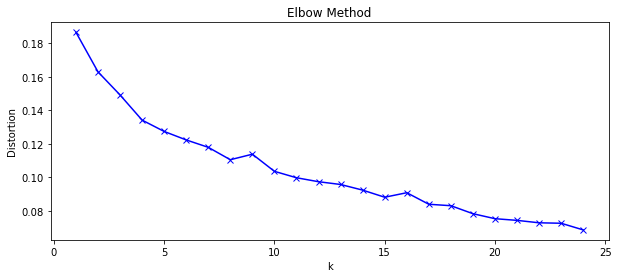

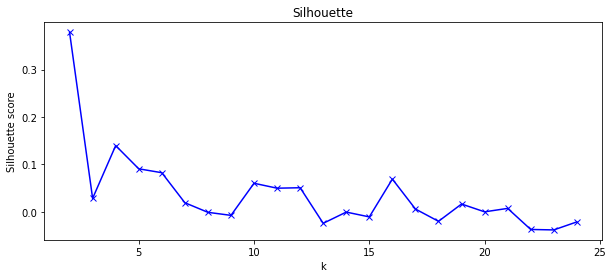

In [345]:
distortions = []
silhouette = []
K = range(1, 25)
for k in tqdm(K):
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="dtw",max_iter = 16)
    kmeanModel.fit(price_m_pct)
    distortions.append(kmeanModel.inertia_)
    if k > 1:
        silhouette.append(silhouette_score(price_m_pct, kmeanModel.labels_))


plt.figure(figsize=(10,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(K[1:], silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette')
plt.show()

In [346]:
n_clusters = 9
ts_kmeans_dtw = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw",max_iter = 16)
ts_kmeans_dtw.fit(price_m_pct)

TimeSeriesKMeans(max_iter=16, metric='dtw', n_clusters=9)

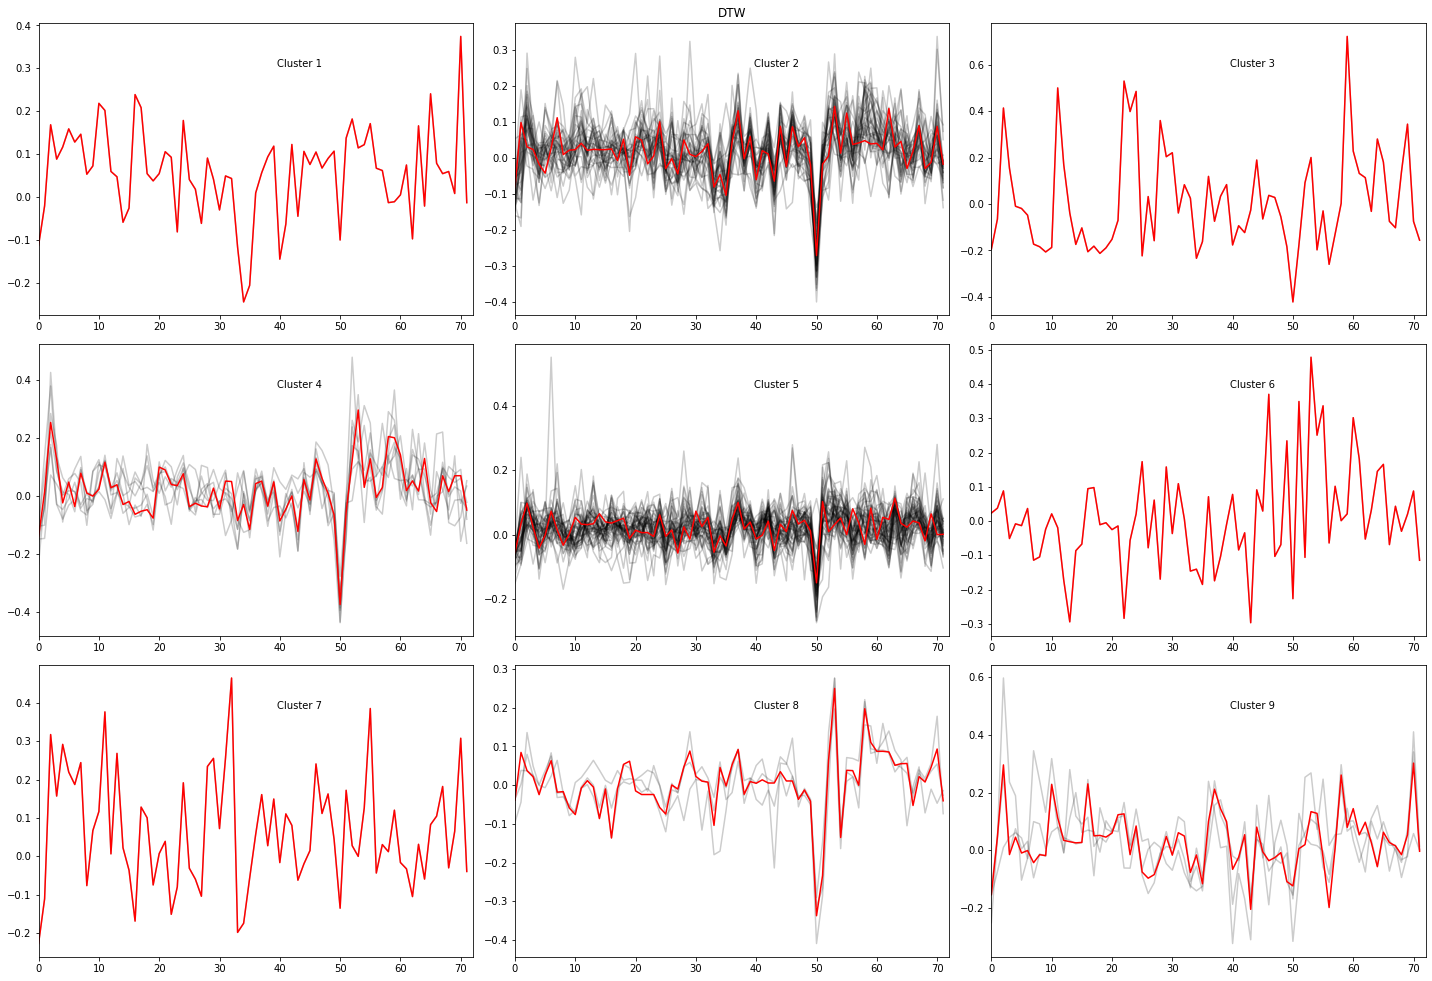

In [347]:
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler
ts_kmeans_dtw = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw",max_iter=16)
y_pred = ts_kmeans_dtw.fit_predict(price_m_pct)
sz = price_m_pct.shape[1]

plt.figure(figsize=(20,40))
for yi in range(9):
    plt.subplot(9, 3, 4+yi)
    for xx in price_m_pct[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(ts_kmeans_dtw.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DTW")
plt.tight_layout()
plt.show()

In [348]:
labels = ts_kmeans_dtw.labels_
max_esg_claster = []
for i in range(n_clusters):
    clt  = np.where(labels == i)
    assetsCluster = np.array(assetLabels)[clt]
    max_esg_claster.append(max(assetsCluster))
    
max_esg_claster
equal_w = 1/n_clusters
claster_weights = pd.Series(data = np.repeat(equal_w,n_clusters),
                            index = max_esg_claster,
                            name = 'clasters_max_esg')

In [349]:
claster_weights

NVIDIA Corporation              0.111111
Workday, Inc.                   0.111111
Northern Oil and Gas, Inc.      0.111111
West Fraser Timber Co. Ltd      0.111111
eBay Inc.                       0.111111
Vista Outdoor Inc.              0.111111
Advanced Micro Devices, Inc.    0.111111
Simon Property Group, Inc.      0.111111
Rogers Corporation              0.111111
Name: clasters_max_esg, dtype: float64

In [350]:
sorted_df = sorted_df.merge(claster_weights,
                            left_on = 'shortName', 
                            right_on = claster_weights.index,
                            how='left')

In [351]:
sorted_df['clasters_max_esg'] = sorted_df['clasters_max_esg'].replace(np.nan,0)

In [352]:
sorted_df

,Unnamed: 0,shortName,industry,marketCap,Symbol,ESG Score,min_risk_w,type,weight_cap,weight_esg_equal,clasters_max_esg
0,50,Apple Inc.,Consumer Electronics,2802181734400,AAPL,66.15,0.0000,4.0,0.016667,0.00,0.000000
1,0,Microsoft Corporation,Software—Infrastructure,2402269528064,MSFT,76.30,0.0000,4.0,0.016667,0.05,0.000000
2,53,Alphabet Inc.,Internet Content & Information,1888773996544,GOOGL,65.76,0.0000,4.0,0.016667,0.00,0.000000
3,84,"Meta Platforms, Inc.",Internet Content & Information,921042485248,FB,62.86,0.0000,4.0,0.016667,0.00,0.000000
4,25,ASML Holding N.V. - New York Re,Semiconductor Equipment & Materials,313330991104,ASML,68.41,0.0000,4.0,0.016667,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
91,27,Cabot Corporation,Specialty Chemicals,2955381248,CBT,68.10,0.0000,1.0,0.022727,0.00,0.000000
92,98,Gentherm Inc,Auto Parts,2483595008,THRM,61.95,0.0000,1.0,0.022727,0.00,0.000000
93,38,Vista Outdoor Inc.,Leisure,2254601472,VSTO,66.80,0.0220,1.0,0.022727,0.00,0.111111
94,92,D/B/A Centerspace,Real Estate Services,1388649856,CSR,62.27,0.0182,1.0,0.022727,0.00,0.000000


### Создание пакета весов на основе капитализации компаний

In [353]:
weight_cap = sorted_df[['shortName','weight_cap']]
weight_esg_equal = sorted_df[['shortName','weight_esg_equal']]
min_risk_w = sorted_df[['shortName','min_risk_w']]
clasters_max_esg = sorted_df[['shortName','clasters_max_esg']]
weight_cap
cap = weight_cap.merge(price.T,left_on = 'shortName',right_on = price.T.index)
esg_equal = weight_esg_equal.merge(price.T,left_on = 'shortName',right_on = price.T.index)
min_risk = min_risk_w.merge(price.T,left_on = 'shortName',right_on = price.T.index)
clasters_max = clasters_max_esg.merge(price.T,left_on = 'shortName',right_on = price.T.index)

In [354]:
n = 10000
cap['weight_cap'] = cap['weight_cap']*n
cap['weight_cap'] = cap['weight_cap']/ cap[cap.columns[2]]
cap.loc[96,:] = 0
for i in cap.columns[2:]:
    cap[i] = cap['weight_cap']*cap[i]
    cap.loc[96,i] = sum(cap[i])

In [355]:
esg_equal['weight_esg_equal'] = esg_equal['weight_esg_equal']*n
esg_equal['weight_esg_equal'] = esg_equal['weight_esg_equal']/ esg_equal[esg_equal.columns[2]]
esg_equal.loc[96,:] = 0
for i in esg_equal.columns[2:]:
    esg_equal[i] = esg_equal['weight_esg_equal']*esg_equal[i]
    esg_equal.loc[96,i] = sum(esg_equal[i])

In [356]:
min_risk['min_risk_w'] = min_risk['min_risk_w']*n
min_risk['min_risk_w'] = min_risk['min_risk_w']/ min_risk[min_risk.columns[2]]
min_risk.loc[96,:] = 0
for i in min_risk.columns[2:]:
    min_risk[i] = min_risk['min_risk_w']*min_risk[i]
    min_risk.loc[96,i] = sum(min_risk[i])

In [357]:
clasters_max['clasters_max_esg'] = clasters_max['clasters_max_esg']*n
clasters_max['clasters_max_esg'] = clasters_max['clasters_max_esg']/ clasters_max[clasters_max.columns[2]]
clasters_max.loc[96,:] = 0
for i in clasters_max.columns[2:]:
    clasters_max[i] = clasters_max['clasters_max_esg']*clasters_max[i]
    clasters_max.loc[96,i] = sum(clasters_max[i])

### Визуализация портфелей

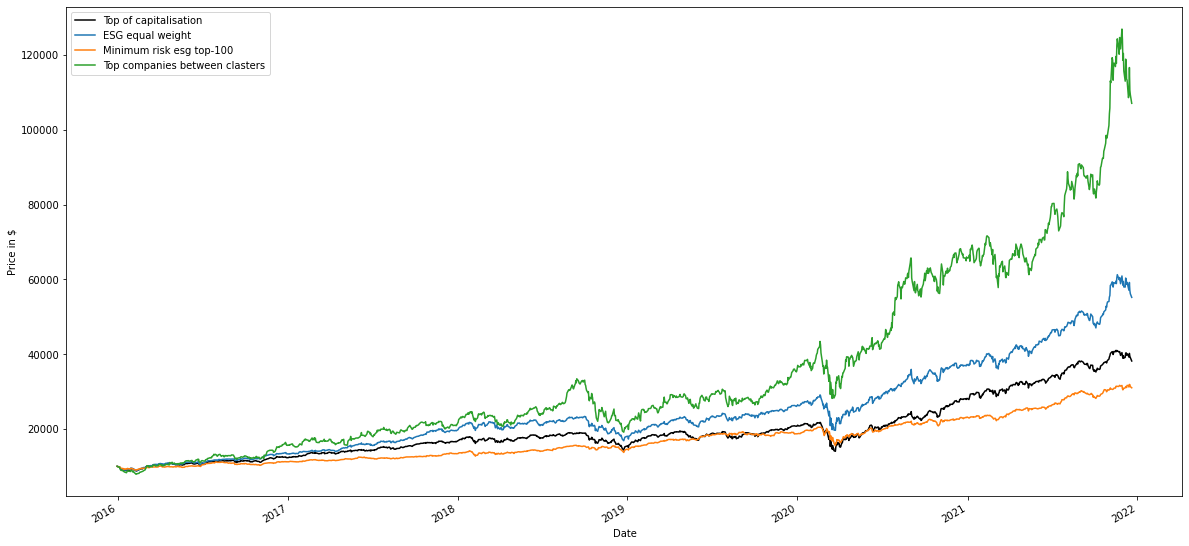

In [358]:
fig = plt.figure()
ax1 = fig.add_subplot(111,  ylabel='Price in $',xlabel = 'Date')
cap.loc[96,:][2:].plot(ax=ax1, color='black', label = 'Top of capitalisation')
esg_equal.loc[96,:][2:].plot(ax=ax1, label = 'ESG equal weight')
min_risk.loc[96,:][2:].plot(ax=ax1, label = 'Minimum risk esg top-100')
clasters_max.loc[96,:][2:].plot(ax=ax1, label = 'Top companies between clasters')
fig.set_figwidth(20)    
fig.set_figheight(10)
plt.legend(loc='best',fontsize = 'medium')
plt.show()

In [359]:
esg_equal.loc[96,:][2:]

2015-12-31         10000.0
2016-01-04     9817.904148
2016-01-05     9785.472876
2016-01-06      9636.45873
2016-01-07     9358.177659
                  ...     
2021-12-14    57096.009344
2021-12-15    59178.557175
2021-12-16    57008.591041
2021-12-17    56157.127081
2021-12-20    55191.715487
Name: 96, Length: 1504, dtype: object

In [360]:
temp = ['Количество', 'Сумма','Среднее', 'Медина', 'Минимум','Максимум','Размах','Стандартное отклонение']
def statistic_(frame):
    # Ищем количество оценок
    num_score = len(frame.values)
    sum_score = sum(frame.values)
    # Считаем среднее значение
    avg_score = sum_score/num_score
    middle = round(num_score / 2)

    # Сортируем в порядке возрастания
    sorted_prices = sorted(frame.values)

    # Находим медиану
    median = sorted_prices[middle]
    
    min_price = min(frame.values)
    max_price = max(frame.values)
    price_range = max_price - min_price
    Standart_dev = np.std(frame.values)
    data = pd.DataFrame([temp, 
                         [num_score,sum_score,avg_score,median,min_price,
                          max_price,price_range,Standart_dev]])
    return(data)

In [361]:
statistic_(cap.loc[96,:][2:])

,0,1,2,3,4,5,6,7
0,Количество,Сумма,Среднее,Медина,Минимум,Максимум,Размах,Стандартное отклонение
1,1504,29284736.301226,19471.234243,17789.818771,8748.394412,41001.831985,32253.437573,7602.796871


In [362]:
statistic_(esg_equal.loc[96,:][2:])

,0,1,2,3,4,5,6,7
0,Количество,Сумма,Среднее,Медина,Минимум,Максимум,Размах,Стандартное отклонение
1,1504,36696726.186373,24399.419007,21704.822795,8805.090809,61262.988725,52457.897916,11645.137729


In [363]:
statistic_(min_risk.loc[96,:][2:])

,0,1,2,3,4,5,6,7
0,Количество,Сумма,Среднее,Медина,Минимум,Максимум,Размах,Стандартное отклонение
1,1504,25401897.289741,16889.559368,15396.245001,8976.487634,31911.215255,22934.727622,5708.144156


In [364]:
statistic_(clasters_max.loc[96,:][2:])

,0,1,2,3,4,5,6,7
0,Количество,Сумма,Среднее,Медина,Минимум,Максимум,Размах,Стандартное отклонение
1,1504,52815062.460624,35116.397913,26074.548388,7916.139621,126948.768214,119032.628593,24570.584141


In [365]:
statistic_(pd.DataFrame(esg['ESG Score'])).loc[1,1]

array([6660.91])

In [366]:
df = statistic_(pd.DataFrame(esg['ESG Score']))

In [367]:

for i in range(7):
    df.loc[1,i] = round(int(df.loc[1,i]))

In [368]:
df

,0,1,2,3,4,5,6,7
0,Количество,Сумма,Среднее,Медина,Минимум,Максимум,Размах,Стандартное отклонение
1,100,6660,66,66,61,76,14,3.620993


In [369]:
sum(pd.DataFrame(esg['ESG Score']).values)

array([6660.91])

### Обработка собранных данных из терминала блумберг и создание портфелей на основе различных рейтингов

In [370]:
esg_bloomberg = pd.read_excel('ESG_S_amp_P500.xlsx',sheet_name= 1,header = 1)
esg_bloomberg

,Unnamed: 0,Unnamed: 1,ESG_SCORE,ENVIRONMENTAL_SCORE,GOVERNANCE_SCORE,SOCIAL_SCORE,ESG_RATING,ROBECOSAM_TOTAL_STBLY_RANK,ESG_DISCLOSURE_SCORE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MSFT,MSFT US Equity,#N/A Field Not Applicable,5.89,8.54,2.39,AAA,98.0,NaN
2,LIN,LIN US Equity,#N/A Field Not Applicable,5.12,NaN,5.94,A,99.0,73.664621
3,ACN,ACN US Equity,#N/A Field Not Applicable,5.23,7.72,1.26,AA,80.0,NaN
4,JBHT,JBHT US Equity,#N/A Field Not Applicable,5.12,6.01,2.6,A,86.0,50.759481
...,...,...,...,...,...,...,...,...,...
96,TSCO,TSCO US Equity,#N/A Field Not Applicable,#N/A Field Not Applicable,7.36,#N/A Field Not Applicable,AA,77.0,56.000402
97,CMG,CMG US Equity,#N/A Field Not Applicable,#N/A Field Not Applicable,6.64,#N/A Field Not Applicable,BBB,65.0,46.889952
98,ZTS,ZTS US Equity,#N/A Field Not Applicable,#N/A Field Not Applicable,7.61,#N/A Field Not Applicable,AA,65.0,45.867769
99,THRM,THRM US Equity,#N/A Field Not Applicable,#N/A Field Not Applicable,#N/A Field Not Applicable,#N/A Field Not Applicable,N.S.,34.0,41.322314


In [371]:
temp1 = ['Количество','Среднее', 'Медина', 'Минимум','Максимум','Размах','Стандартное отклонение']
def statistic_1(frame):
    # Ищем количество оценок
    num_score = len(frame.values)
    # Считаем среднее значение
    avg_score = sum(frame.values)/num_score
    middle = round(num_score / 2)

    # Сортируем в порядке возрастания
    sorted_prices = sorted(frame.values)

    # Находим медиану
    median = sorted_prices[middle]
    
    min_price = min(frame.values)
    max_price = max(frame.values)
    price_range = max_price - min_price
    Standart_dev = np.std(frame.values)
    data = pd.DataFrame([temp1, 
                         [num_score,avg_score,median,min_price,
                          max_price,price_range,Standart_dev]])
    return(data)

In [372]:
robevosam = esg_bloomberg[['Unnamed: 0','ROBECOSAM_TOTAL_STBLY_RANK']]
robevosam = robevosam.drop(0)
disclosure = esg_bloomberg[['Unnamed: 0','ESG_DISCLOSURE_SCORE']]
disclosure = disclosure[~disclosure['ESG_DISCLOSURE_SCORE'].isna()]
esg_rate_bloom = esg_bloomberg[['Unnamed: 0','ESG_RATING']]
esg_rate_bloom = esg_rate_bloom.drop(0)
esg_rate_bloom = esg_rate_bloom[~esg_rate_bloom.ESG_RATING.eq('N.S.')]

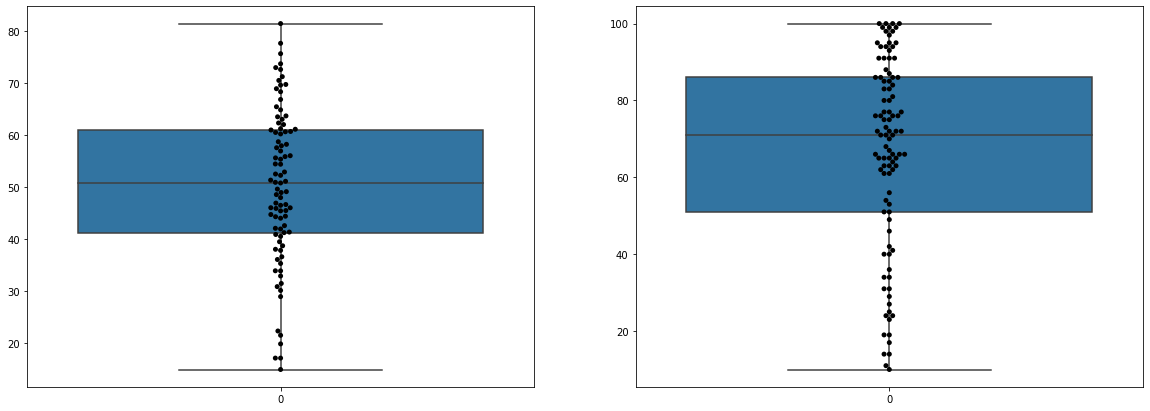

In [373]:
plt.subplots(2, 2,figsize=(20,7))
plt.subplot(121)
sns.boxplot(data = disclosure.ESG_DISCLOSURE_SCORE.tolist())
sns.swarmplot(data = disclosure.ESG_DISCLOSURE_SCORE.tolist(),color = '.0')

plt.subplot(122)
sns.boxplot(data = robevosam.ROBECOSAM_TOTAL_STBLY_RANK.tolist())
sns.swarmplot(data = robevosam.ROBECOSAM_TOTAL_STBLY_RANK.tolist(),color = '.0');

In [374]:
robevosam = robevosam.set_index("Unnamed: 0")

In [375]:
robevosam

,ROBECOSAM_TOTAL_STBLY_RANK
Unnamed: 0,
MSFT,98.0
LIN,99.0
ACN,80.0
JBHT,86.0
XYL,75.0
...,...
TSCO,77.0
CMG,65.0
ZTS,65.0


In [376]:
statistic_1(robevosam['ROBECOSAM_TOTAL_STBLY_RANK'])

,0,1,2,3,4,5,6
0,Количество,Среднее,Медина,Минимум,Максимум,Размах,Стандартное отклонение
1,100,66.26,71.0,10.0,100.0,90.0,25.086498


In [377]:
statistic_1(esg['ESG Score'])

,0,1,2,3,4,5,6
0,Количество,Среднее,Медина,Минимум,Максимум,Размах,Стандартное отклонение
1,100,66.6091,66.27,61.89,76.3,14.41,3.620993


In [378]:
robevosam.loc[robevosam['ROBECOSAM_TOTAL_STBLY_RANK'] >= 95,
              'weight_rob_equal'] = 1/sum(robevosam['ROBECOSAM_TOTAL_STBLY_RANK'] >= 95)
robevosam.loc[robevosam['ROBECOSAM_TOTAL_STBLY_RANK'] < 95, 'weight_rob_equal'] = 0
rob95 = robevosam[robevosam['weight_rob_equal'] >0]
rob95 = rob95.reset_index()
rob95

,Unnamed: 0,ROBECOSAM_TOTAL_STBLY_RANK,weight_rob_equal
0,MSFT,98.0,0.076923
1,LIN,99.0,0.076923
2,GIL,95.0,0.076923
3,HPE,98.0,0.076923
4,ADBE,99.0,0.076923
5,BLL,97.0,0.076923
6,CNHI,100.0,0.076923
7,OC,100.0,0.076923
8,YUM,95.0,0.076923
9,ABT,100.0,0.076923


In [379]:
#full_ticker_data = []

#for ticker in tqdm(robevosam[robevosam['weight_rob_equal'] >0].index):
#    try:
#        ticker_obj = yf.Ticker(ticker)
#        info = get_info(ticker_obj)
#       full_ticker_data.append(info)
#    except:
#        continue
        
#full_ticker_df = pd.DataFrame(full_ticker_data)

#temp = full_ticker_df.join(rob95[['Unnamed: 0','weight_rob_equal']],on=None).drop(['marketCap','Unnamed: 0'],axis = 1)
#temp

In [380]:
clasterr = sorted_df[sorted_df['clasters_max_esg']>0]
clasterr = clasterr[['shortName','industry','clasters_max_esg']]
clasterr

,shortName,industry,clasters_max_esg
16,NVIDIA Corporation,Semiconductors,0.111111
19,"Advanced Micro Devices, Inc.",Semiconductors,0.111111
27,"Workday, Inc.",Software—Application,0.111111
36,"Simon Property Group, Inc.",REIT—Retail,0.111111
39,eBay Inc.,Internet Retail,0.111111
66,West Fraser Timber Co. Ltd,Lumber & Wood Production,0.111111
84,Rogers Corporation,Electronic Components,0.111111
93,Vista Outdoor Inc.,Leisure,0.111111
95,"Northern Oil and Gas, Inc.",Oil & Gas E&P,0.111111


In [381]:
sorted_df[sorted_df['min_risk_w']>0].shape

(17, 11)

In [382]:
#temp.to_csv('rob95.csv')
rob95 = pd.read_csv('rob95.csv')
rob95 = rob95.drop('Unnamed: 0',axis = 1)
rob95

,shortName,industry,weight_rob_equal
0,Microsoft Corporation,Software—Infrastructure,0.076923
1,Linde plc,Specialty Chemicals,0.076923
2,"Gildan Activewear, Inc.",Apparel Manufacturing,0.076923
3,Hewlett Packard Enterprise Comp,Communication Equipment,0.076923
4,Adobe Inc.,Software—Infrastructure,0.076923
5,Ball Corporation,Packaging & Containers,0.076923
6,CNH Industrial N.V.,Farm & Heavy Construction Machinery,0.076923
7,Owens Corning Inc,Building Products & Equipment,0.076923
8,"Yum! Brands, Inc.",Restaurants,0.076923
9,Abbott Laboratories,Medical Devices,0.076923


In [383]:
esg_rate_bloom

,Unnamed: 0,ESG_RATING
1,MSFT,AAA
2,LIN,A
3,ACN,AA
4,JBHT,A
5,XYL,AAA
...,...,...
94,HOLX,AA
96,TSCO,AA
97,CMG,BBB
98,ZTS,AA


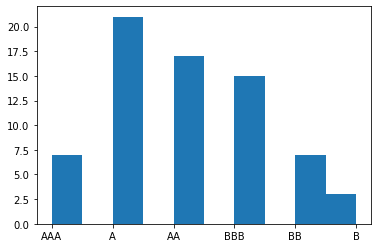

In [384]:
plt.hist(esg_rate_bloom.ESG_RATING);

In [385]:
esg_rate_bloom.groupby('ESG_RATING').count()

,Unnamed: 0
ESG_RATING,
A,21
AA,17
AAA,7
B,3
BB,7
BBB,15


In [386]:
msci_weight = esg_rate_bloom.set_index('Unnamed: 0')
msci_weight.loc[msci_weight['ESG_RATING'] == 'AAA', 'weight_esg_msci'] = 1/7
msci_weight.loc[msci_weight['ESG_RATING'] != 'AAA', 'weight_esg_msci'] = 0
msci_top = msci_weight[msci_weight.weight_esg_msci !=0]
msci_top

,ESG_RATING,weight_esg_msci
Unnamed: 0,,
MSFT,AAA,0.142857
XYL,AAA,0.142857
TXN,AAA,0.142857
NVDA,AAA,0.142857
ADBE,AAA,0.142857
ASML,AAA,0.142857
CNHI,AAA,0.142857


In [387]:
sorted_df = sorted_df.merge(msci_weight,
                            left_on = 'Symbol', 
                            right_on = msci_weight.index,
                            how='left')
sorted_df = sorted_df.replace(np.nan,0)

In [388]:
#full_ticker_data = []

#for ticker in tqdm(msci_top.index):
#    try:
#        ticker_obj = yf.Ticker(ticker)
#        info = get_info(ticker_obj)
#        full_ticker_data.append(info)
#    except:
#        continue
        
#temp = pd.DataFrame(full_ticker_data)
#msci_top = msci_top.reset_index()
#temp = temp.join(msci_top[['Unnamed: 0','weight_esg_msci']],on=None).drop(['marketCap','Unnamed: 0'],axis = 1)
#temp
#temp.to_csv('msci_top.csv')


In [389]:
msci_top = pd.read_csv('msci_top.csv')
msci_top = msci_top.drop('Unnamed: 0',axis = 1)
msci_top

,shortName,industry,weight_esg_msci
0,Microsoft Corporation,Software—Infrastructure,0.142857
1,Xylem Inc.,Specialty Industrial Machinery,0.142857
2,Texas Instruments Incorporated,Semiconductors,0.142857
3,NVIDIA Corporation,Semiconductors,0.142857
4,Adobe Inc.,Software—Infrastructure,0.142857
5,ASML Holding N.V. - New York Re,Semiconductor Equipment & Materials,0.142857
6,CNH Industrial N.V.,Farm & Heavy Construction Machinery,0.142857


In [390]:
sorted_df[sorted_df['Symbol'] == 'ETN']

,Unnamed: 0,shortName,industry,marketCap,Symbol,ESG Score,min_risk_w,type,weight_cap,weight_esg_equal,clasters_max_esg,ESG_RATING,weight_esg_msci
29,34,"Eaton Corporation, PLC",Specialty Industrial Machinery,64469327872,ETN,66.95,0.0,3.0,0.00463,0.0,0.0,BBB,0.0


In [391]:
weight_MSCI = sorted_df[['shortName','weight_esg_msci']]
MSCI = weight_MSCI.merge(price.T,left_on = 'shortName',right_on = price.T.index)

In [392]:
n = 10000
MSCI['weight_esg_msci'] = MSCI['weight_esg_msci']*n
MSCI['weight_esg_msci'] = MSCI['weight_esg_msci']/ MSCI[MSCI.columns[2]]
MSCI.loc[96,:] = 0
for i in MSCI.columns[2:]:
    MSCI[i] = MSCI['weight_esg_msci']*MSCI[i]
    MSCI.loc[96,i] = sum(MSCI[i])

In [393]:

sorted_df = sorted_df.merge(robevosam,
                            left_on = 'Symbol', 
                            right_on = robevosam.index,
                            how='left')
sorted_df = sorted_df.replace(np.nan,0)

In [394]:
weight_rob = sorted_df[['shortName','weight_rob_equal']]
rob = weight_rob.merge(price.T,left_on = 'shortName',right_on = price.T.index)

In [395]:
n = 10000
rob['weight_rob_equal'] = rob['weight_rob_equal']*n
rob['weight_rob_equal'] = rob['weight_rob_equal']/ rob[rob.columns[2]]
rob.loc[96,:] = 0
for i in rob.columns[2:]:
    rob[i] = rob['weight_rob_equal']*rob[i]
    rob.loc[96,i] = sum(rob[i])

In [396]:
#full_ticker_data = []
#def get_info_name(ticker_obj):
#    info_keys = ['shortName']
#    info_values = []
#    for key in info_keys:
#        info_values.append(ticker_obj.info.get(key, None))
#    return dict(zip(info_keys, info_values))

In [397]:
#tickers = ['NDX']
#for ticker in tqdm(tickers):
#    try:
#        ticker_obj = yf.Ticker(ticker)
#        close_price = ticker_obj.history(start="2016-01-01",end = "2021-12-21", period='1m')['Close'].to_dict()
#        info = get_info_name(ticker_obj)
#        info.update(close_price)
#        full_ticker_data.append(info)
#    except:
#        continue
        
#full_ticker_df = pd.DataFrame(full_ticker_data)
#full_ticker_df

In [398]:
#full_ticker_df.T.drop('shortName').to_csv('NDX')

In [399]:
ndx = pd.read_csv('NDX',index_col = 'Unnamed: 0',parse_dates=True)
ndx = ndx.T
k = n/ndx['2015-12-31'][0]
ndx = ndx*k
ndx

,2015-12-31,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-11,2016-01-12,2016-01-13,2016-01-14,...,2021-12-07,2021-12-08,2021-12-09,2021-12-10,2021-12-13,2021-12-14,2021-12-15,2021-12-16,2021-12-17,2021-12-20
0,10000.0,9792.282718,9762.500695,9675.003245,9373.975831,9297.907084,9325.70867,9434.934581,9107.063376,9302.675864,...,35542.565725,35692.088151,35159.200839,35556.325666,35013.290611,34648.301369,35464.037112,34537.356529,34401.330411,34022.906518


In [400]:
rob.loc[96,:][2:]

2015-12-31         10000.0
2016-01-04      9812.82809
2016-01-05     9792.789407
2016-01-06     9718.899981
2016-01-07     9423.652685
                  ...     
2021-12-14    33494.683594
2021-12-15    33977.031624
2021-12-16    33282.522092
2021-12-17    33012.560223
2021-12-20    32454.673129
Name: 96, Length: 1504, dtype: object

### Визуализация результатов

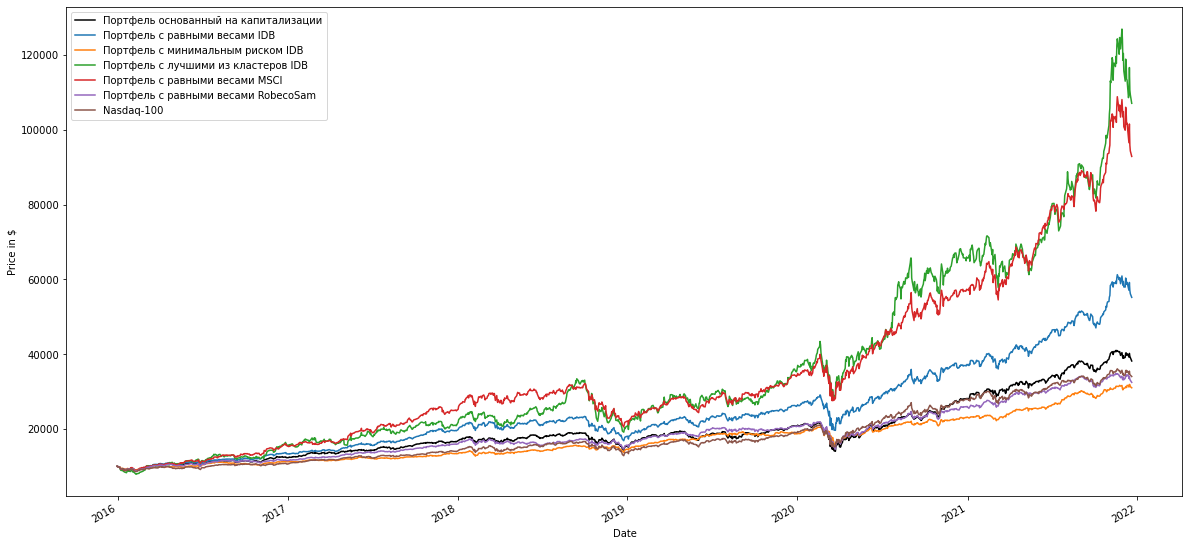

In [401]:
fig = plt.figure()
ax1 = fig.add_subplot(111,  ylabel='Price in $',xlabel = 'Date')
cap.loc[96,:][2:].plot(ax=ax1, color='black', label = 'Портфель основанный на капитализации')
esg_equal.loc[96,:][2:].plot(ax=ax1, label = 'Портфель с равными весами IDB')
min_risk.loc[96,:][2:].plot(ax=ax1, label = 'Портфель с минимальным риском IDB')
clasters_max.loc[96,:][2:].plot(ax=ax1, label = 'Портфель с лучшими из кластеров IDB')
MSCI.loc[96,:][2:].plot(ax=ax1, label = 'Портфель с равными весами MSCI')
rob.loc[96,:][2:].plot(ax=ax1, label = 'Портфель с равными весами RobecoSam')
ndx.T.iloc[:,0].plot(ax=ax1, label = 'Nasdaq-100')
fig.set_figwidth(20)    
fig.set_figheight(10)
plt.legend(loc='best',fontsize = 'medium')
plt.show()

In [402]:
statistic_(MSCI.loc[96,:][2:])

,0,1,2,3,4,5,6,7
0,Количество,Сумма,Среднее,Медина,Минимум,Максимум,Размах,Стандартное отклонение
1,1504,51959386.406712,34547.464366,28266.644797,8808.923007,108856.844438,100047.921431,22053.413116


In [403]:
statistic_(rob.loc[96,:][2:])

,0,1,2,3,4,5,6,7
0,Количество,Сумма,Среднее,Медина,Минимум,Максимум,Размах,Стандартное отклонение
1,1504,27973357.673306,18599.306964,16958.856843,8686.54946,34860.759885,26174.210425,6546.764715


In [404]:
statistic_(ndx.T.iloc[:,0])

,0,1,2,3,4,5,6,7
0,Количество,Сумма,Среднее,Медина,Минимум,Максимум,Размах,Стандартное отклонение
1,1504,26997300.28871,17950.332639,15841.50321,8594.748473,36081.788733,27487.040259,7288.50059


In [405]:
ts = pd.DataFrame([MSCI.iloc[96,2:].values,cap.iloc[96,2:].values,esg_equal.iloc[96,2:].values,
              min_risk.iloc[96,2:].values,clasters_max.iloc[96,2:].values,rob.iloc[96,2:].values,
                  ndx.T.iloc[:,0].values]).T
ts.columns = ['Равные веса MSCI','Капитализация','Равные веса IDB','Минимизация риска',
              'Использование кластеров','Равные веса RobecoSAM','Nasdaq-100']

In [406]:
corr_matrix = ts.loc[:,['Равные веса MSCI','Капитализация','Равные веса IDB','Минимизация риска',
              'Использование кластеров','Равные веса RobecoSAM','Nasdaq-100']].corr()
print(corr_matrix)


                         Равные веса MSCI  Капитализация  Равные веса IDB  \
Равные веса MSCI                 1.000000       0.987712         0.995394   
Капитализация                    0.987712       1.000000         0.992715   
Равные веса IDB                  0.995394       0.992715         1.000000   
Минимизация риска                0.964540       0.970143         0.980405   
Использование кластеров          0.991333       0.973591         0.987613   
Равные веса RobecoSAM            0.973805       0.987722         0.988508   
Nasdaq-100                       0.983728       0.983282         0.989711   

                         Минимизация риска  Использование кластеров  \
Равные веса MSCI                  0.964540                 0.991333   
Капитализация                     0.970143                 0.973591   
Равные веса IDB                   0.980405                 0.987613   
Минимизация риска                 1.000000                 0.962396   
Использование кластеров     

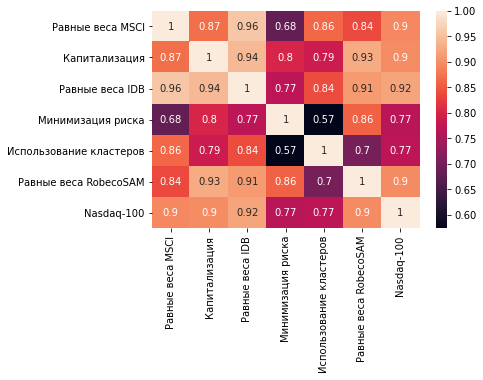

In [407]:
sns.heatmap(ts.pct_change()[1:].corr(), annot=True);

In [408]:
price_change = price.pct_change()
price_change_cov = price_change.cov()
price_change_cov.values

array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.001, 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.001]])

In [409]:
weight = sorted_df.drop(['Unnamed: 0','Symbol','industry','marketCap',
                         'ESG Score','type','ESG_RATING','ROBECOSAM_TOTAL_STBLY_RANK'],
                       axis = 1).set_index('shortName')
weight = weight.reindex(price_change_cov.index.values)
weight

,min_risk_w,weight_cap,weight_esg_equal,clasters_max_esg,weight_esg_msci,weight_rob_equal
shortName,,,,,,
Microsoft Corporation,0.0000,0.016667,0.05,0.0,0.142857,0.076923
Linde plc,0.0000,0.004630,0.05,0.0,0.000000,0.076923
Accenture plc,0.0000,0.016667,0.05,0.0,0.000000,0.000000
"J.B. Hunt Transport Services, I",0.0196,0.004630,0.05,0.0,0.000000,0.000000
Xylem Inc.,0.0000,0.004630,0.05,0.0,0.142857,0.000000
...,...,...,...,...,...,...
Tractor Supply Company,0.0348,0.004630,0.00,0.0,0.000000,0.000000
"Chipotle Mexican Grill, Inc.",0.0185,0.004630,0.00,0.0,0.000000,0.000000
Zoetis Inc.,0.0000,0.004630,0.00,0.0,0.000000,0.000000


In [410]:
float(np.std(ndx.T.pct_change()[1:]))

0.013657652206593335

In [411]:
float(ndx.T.values[-1]/ndx.T.values[0]-1)

2.4022906517549614

In [412]:
ts

,Равные веса MSCI,Капитализация,Равные веса IDB,Минимизация риска,Использование кластеров,Равные веса RobecoSAM,Nasdaq-100
0,10000.000000,10000.000000,10000.000000,9999.000000,10000.000000,10000.000000,10000.000000
1,9824.490589,9842.797339,9817.904148,9795.684023,9799.173351,9812.828090,9792.282718
2,9821.327643,9843.436121,9785.472876,9836.754902,9737.271458,9792.789407,9762.500695
3,9633.545079,9646.941231,9636.458730,9804.134640,9413.587413,9718.899981,9675.003245
4,9359.806322,9375.595338,9358.177659,9611.975087,9106.481633,9423.652685,9373.975831
...,...,...,...,...,...,...,...
1499,96548.711262,39213.007720,57096.009344,31204.872041,109356.567999,33494.683594,34648.301369
1500,101555.963726,40211.590328,59178.557175,31911.215255,116653.521721,33977.031624,35464.037112
1501,95868.151650,39391.554949,57008.591041,31818.783490,110578.027872,33282.522092,34537.356529
1502,94345.085473,39081.459081,56157.127081,31325.799561,109388.580651,33012.560223,34401.330411


In [413]:
def riskPortf(r):
    return np.sqrt(np.matmul(np.matmul(r,price_change_cov.values),r))

    
rs = []
doh = []
vec = ['Минимизация риска','Капитализация','Равные веса IDB','Использование кластеров',
       'Равные веса MSCI','Равные веса RobecoSAM']
for i in vec:
    rs.append(np.std(ts.pct_change()[i][1:]))

rs.append(float(np.std(ndx.T.pct_change()[1:])))

doh.append(min_risk.loc[96,:][2:][-1]/min_risk.loc[96,:][2:][0]-1)
doh.append(cap.loc[96,:][2:][-1]/cap.loc[96,:][2:][0]-1)
doh.append(esg_equal.loc[96,:][2:][-1]/esg_equal.loc[96,:][2:][0]-1)
doh.append(clasters_max.loc[96,:][2:][-1]/clasters_max.loc[96,:][2:][0]-1)
doh.append(MSCI.loc[96,:][2:][-1]/MSCI.loc[96,:][2:][0]-1)
doh.append(rob.loc[96,:][2:][-1]/rob.loc[96,:][2:][0]-1)
doh.append(float(ndx.T.values[-1]/ndx.T.values[0]-1))

### Построение графика риск-премия

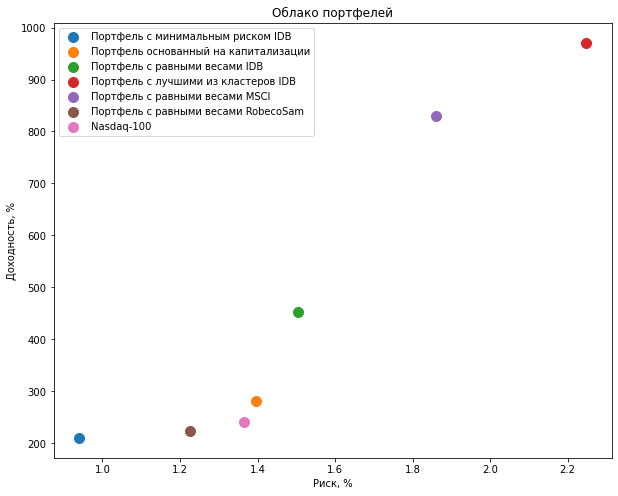

In [414]:
plt.figure(figsize=(10,8))

plt.scatter(rs[0]*100,doh[0]*100,marker='.',label='Портфель с минимальным риском IDB',s =400)
plt.scatter(rs[1]*100,doh[1]*100,marker='.',label='Портфель основанный на капитализации',s =400)
plt.scatter(rs[2]*100,doh[2]*100,marker='.',label='Портфель с равными весами IDB',s =400)
plt.scatter(rs[3]*100,doh[3]*100,marker='.',label='Портфель с лучшими из кластеров IDB',s =400)
plt.scatter(rs[4]*100,doh[4]*100,marker='.',label='Портфель с равными весами MSCI',s =400)
plt.scatter(rs[5]*100,doh[5]*100,marker='.',label='Портфель с равными весами RobecoSam',s =400)
plt.scatter(rs[6]*100,doh[6]*100,marker='.',label='Nasdaq-100',s =400)
plt.xlabel('Риск, %')
plt.ylabel('Доходность, %')
plt.title("Облако портфелей")
plt.legend()

plt.show()


In [415]:
rs

[0.009398852172962152,
 0.013948358476596045,
 0.015039933973944326,
 0.0224808785766534,
 0.018609156500919453,
 0.012263815209105685,
 0.013657652206593335]

In [416]:
doh

[2.1009060295835362,
 2.8173678499451285,
 4.5191715487302915,
 9.708591718524355,
 8.288682739241008,
 2.245467312855134,
 2.4022906517549614]

In [417]:
0.018609156500919453-0.015039933973944326

0.003569222526975127

In [418]:
sorted_df[sorted_df['clasters_max_esg'] > 0 ]

,Unnamed: 0,shortName,industry,marketCap,Symbol,ESG Score,min_risk_w,type,weight_cap,weight_esg_equal,clasters_max_esg,ESG_RATING,weight_esg_msci,ROBECOSAM_TOTAL_STBLY_RANK,weight_rob_equal
16,11,NVIDIA Corporation,Semiconductors,174215725056,NVDA,72.19,0.0000,3.0,0.004630,0.05,0.111111,AAA,0.142857,91.0,0.000000
19,30,"Advanced Micro Devices, Inc.",Semiconductors,166129680384,AMD,67.67,0.0000,3.0,0.004630,0.00,0.111111,A,0.000000,65.0,0.000000
27,67,"Workday, Inc.",Software—Application,66798682112,WDAY,64.30,0.0000,3.0,0.004630,0.00,0.111111,A,0.000000,84.0,0.000000
36,54,"Simon Property Group, Inc.",REIT—Retail,48129318912,SPG,65.40,0.0000,3.0,0.004630,0.00,0.111111,BB,0.000000,66.0,0.000000
39,89,eBay Inc.,Internet Retail,43628019712,EBAY,62.46,0.0475,3.0,0.004630,0.00,0.111111,A,0.000000,99.0,0.076923
66,26,West Fraser Timber Co. Ltd,Lumber & Wood Production,10407206912,WFG,68.38,0.0101,3.0,0.004630,0.00,0.111111,A,0.000000,61.0,0.000000
84,12,Rogers Corporation,Electronic Components,5050422784,ROG,72.08,0.0000,2.0,0.015625,0.05,0.111111,0,0.000000,40.0,0.000000
93,38,Vista Outdoor Inc.,Leisure,2254601472,VSTO,66.80,0.0220,1.0,0.022727,0.00,0.111111,0,0.000000,24.0,0.000000
95,70,"Northern Oil and Gas, Inc.",Oil & Gas E&P,1205967360,NOG,64.03,0.0000,1.0,0.022727,0.00,0.111111,0,0.000000,11.0,0.000000


In [419]:

sorted_df.groupby('type').count()['shortName']

type
1.0    11
2.0    16
3.0    54
4.0    15
Name: shortName, dtype: int64

### Анализ фондов

In [68]:
fonds = pd.read_excel('funds_property_assets.xlsx')

In [69]:
fonds

,id записи,"id фонда, чья структура активов",Название фонда (rus),"Название отрасли актива, рус",Дата структуры активов,Тип актива (англ),Название актива из отчета,Эмитент актива (для фондов - УК) из базы Cbonds,Название актива из базы Cbonds,ISIN (или регистрационный номер) или др.идентификатор из базы Cbonds,"Сумма, руб.","Доля, %",СЧА фодна на дату структуры активов,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,46,NaN,NaN,Электроэнергетика,NaT,stock,"ОГК-4, ао",Unipro,"Unipro, ord.",RU000A0JNGA5,1936-05-01 00:00:00,2022-09-13 00:00:00,NaN,NaN,NaN,NaN
1,47,NaN,NaN,Электроэнергетика,NaT,stock,"Мосэнерго, ао",Mosenergo,"Mosenergo, ord.",RU0008958863,0,2022-08-13 00:00:00,NaN,NaN,NaN,NaN
2,48,NaN,NaN,Электроэнергетика,NaT,stock,"ОГК-4, ао",Unipro,"Unipro, ord.",RU000A0JNGA5,15150,00:00:00,NaN,NaN,NaN,NaN
3,49,NaN,NaN,Электроэнергетика,NaT,stock,"ОГК-6, ао",OGK-6,"OGK-6, ord.",RU000A0JNG63,5830,00:00:00,NaN,NaN,NaN,NaN
4,50,NaN,NaN,Нефтегазовая отрасль,NaT,stock,"Газпром нефть, ао",Gazprom Neft,"Gazprom Neft, ord.",RU0009062467,188860960,1939-05-01 00:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474061,2204795,295.0,КапиталЪ - Облигации,NaN,2022-02-28,bond,"ВЭБ.РФ, ПБО-001P-18 - Облигации [4B02-227-0000...",VEB.RF,PBO-001P-18,RU000A1013P1,0,00:00:00,NaN,NaN,NaN,NaN
474062,2204797,295.0,КапиталЪ - Облигации,NaN,2022-02-28,bond,"ВЭБ.РФ, ПБО-001P-17 - Облигации [4B02-177-0000...",VEB.RF,PBO-001P-17,RU000A100GY1,0,00:00:00,NaN,NaN,NaN,NaN
474063,2204799,6159.0,РСХБ - Драгметаллы,NaN,2022-02-28,bond,"Россия, 26211 (ОФЗ-ПД, SU26211RMFS1) - Облигац...",Russia,"26211 (OFZ-PD, SU26211RMFS1)",RU000A0JTJL3,0,00:00:00,NaN,NaN,NaN,NaN
474064,2204801,6159.0,РСХБ - Драгметаллы,NaN,2022-02-28,bond,"Россия, 26215 (ОФЗ-ПД, SU26215RMFS2) - Облигац...",Russia,"26215 (OFZ-PD, SU26215RMFS2)",RU000A0JU4L3,0,00:00:00,NaN,NaN,NaN,NaN


In [70]:
import pandas as pd 
import requests 
from urllib.parse import urlencode 
 
# используем api 
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/6TT8-DOGjGx23Q'

 
# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
# загружаем файл в df 
download_response = requests.get(download_url) 
fonds_perc = pd.read_csv(download_url, sep=';',encoding='ISO-8859-1') 

In [71]:
fonds['Доля, %'] = fonds_perc['Äîëÿ, %']

In [72]:
fonds = fonds.iloc[47:,:]

In [73]:
fonds = fonds.reset_index(drop = True)

In [74]:
fonds['id фонда, чья структура активов'].nunique()

864

In [75]:
fonds['Тип актива (англ)'].unique()

array(['stock', 'bond', 'russian_fund', 'metal', 'etf', 'foreign_stock'],
      dtype=object)

In [76]:
# fonds_T = pd.DataFrame()
# for i in fonds['id фонда, чья структура активов'].unique():
#     temp = fonds[fonds['id фонда, чья структура активов'] == i]
#     if sum((temp['Тип актива (англ)'] != 'stock') & (temp['Тип актива (англ)'] != 'foreign_stock')) == 0:
#         fonds_T = fonds_T.append(temp)

In [77]:
#fonds_T['id фонда, чья структура активов'].nunique()

In [78]:
fonds = fonds[fonds['Тип актива (англ)'] == 'stock']
fonds

,id записи,"id фонда, чья структура активов",Название фонда (rus),"Название отрасли актива, рус",Дата структуры активов,Тип актива (англ),Название актива из отчета,Эмитент актива (для фондов - УК) из базы Cbonds,Название актива из базы Cbonds,ISIN (или регистрационный номер) или др.идентификатор из базы Cbonds,"Сумма, руб.","Доля, %",СЧА фодна на дату структуры активов,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,405,964.0,ОПТИМ Индекс ММВБ,Прочие транспортные услуги,2009-09-30,stock,"Аэрофлот, ао",Aeroflot,"Aeroflot, ord.",RU0009062285,13680,0.253053,5396870.30,NaN,NaN,NaN
1,406,964.0,ОПТИМ Индекс ММВБ,Прочие финансовые институты,2009-09-30,stock,"ВТБ, ао",VTB Bank (PAO),"VTB, ord.",RU000A0JP5V6,142500,2.635973,5396870.30,NaN,NaN,NaN
2,407,964.0,ОПТИМ Индекс ММВБ,Связь и телекоммуникация,2009-09-30,stock,"ВолгаТелеком, ао",Rostelecom - Volga,"Rostelecom - Volga, ord.",RU0009058234,5409,0.100056,5396870.30,NaN,NaN,NaN
3,408,964.0,ОПТИМ Индекс ММВБ,Нефтегазовая отрасль,2009-09-30,stock,"Газпром, ао",Gazprom,"Gazprom, ord.",RU0007661625,745080,13.782533,5396870.30,NaN,NaN,NaN
4,409,964.0,ОПТИМ Индекс ММВБ,Нефтегазовая отрасль,2009-09-30,stock,"Газпром нефть, ао",Gazprom Neft,"Gazprom Neft, ord.",RU0009062467,75276,1.392460,5396870.30,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473988,2204699,46.0,Агидель - акции,Банки,2022-02-28,stock,"Банк Санкт-Петербург, акция, [10300436B]",Bank Saint Petersburg,"Bank Saint Petersburg, ord.",RU0009100945,0,0.000000,25546395.36,NaN,NaN,NaN
473989,2204701,46.0,Агидель - акции,Электроэнергетика,2022-02-28,stock,"ИНТЕР РАО, акция, [1-04-33498-E]",INTER RAO,"INTER RAO, ord.",RU000A0JPNM1,0,0.000000,25546395.36,NaN,NaN,NaN
473990,2204703,46.0,Агидель - акции,Специализированная розничная торговля,2022-02-28,stock,"Детский мир, акция, [1-02-00844-A]",Detsky Mir,"Detsky Mir, ord.",RU000A0JSQ90,0,0.000000,25546395.36,NaN,NaN,NaN
473991,2204705,46.0,Агидель - акции,Нефтегазовая отрасль,2022-02-28,stock,"Роснефть, акция об. [1-02-00122-A]",Rosneft,"Rosneft, ord.",RU000A0J2Q06,0,0.000000,25546395.36,NaN,NaN,NaN


In [79]:
temp = fonds[fonds['Доля, %'] < 100]
temp

,id записи,"id фонда, чья структура активов",Название фонда (rus),"Название отрасли актива, рус",Дата структуры активов,Тип актива (англ),Название актива из отчета,Эмитент актива (для фондов - УК) из базы Cbonds,Название актива из базы Cbonds,ISIN (или регистрационный номер) или др.идентификатор из базы Cbonds,"Сумма, руб.","Доля, %",СЧА фодна на дату структуры активов,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,405,964.0,ОПТИМ Индекс ММВБ,Прочие транспортные услуги,2009-09-30,stock,"Аэрофлот, ао",Aeroflot,"Aeroflot, ord.",RU0009062285,13680,0.253053,5396870.30,NaN,NaN,NaN
1,406,964.0,ОПТИМ Индекс ММВБ,Прочие финансовые институты,2009-09-30,stock,"ВТБ, ао",VTB Bank (PAO),"VTB, ord.",RU000A0JP5V6,142500,2.635973,5396870.30,NaN,NaN,NaN
2,407,964.0,ОПТИМ Индекс ММВБ,Связь и телекоммуникация,2009-09-30,stock,"ВолгаТелеком, ао",Rostelecom - Volga,"Rostelecom - Volga, ord.",RU0009058234,5409,0.100056,5396870.30,NaN,NaN,NaN
3,408,964.0,ОПТИМ Индекс ММВБ,Нефтегазовая отрасль,2009-09-30,stock,"Газпром, ао",Gazprom,"Gazprom, ord.",RU0007661625,745080,13.782533,5396870.30,NaN,NaN,NaN
4,409,964.0,ОПТИМ Индекс ММВБ,Нефтегазовая отрасль,2009-09-30,stock,"Газпром нефть, ао",Gazprom Neft,"Gazprom Neft, ord.",RU0009062467,75276,1.392460,5396870.30,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473988,2204699,46.0,Агидель - акции,Банки,2022-02-28,stock,"Банк Санкт-Петербург, акция, [10300436B]",Bank Saint Petersburg,"Bank Saint Petersburg, ord.",RU0009100945,0,0.000000,25546395.36,NaN,NaN,NaN
473989,2204701,46.0,Агидель - акции,Электроэнергетика,2022-02-28,stock,"ИНТЕР РАО, акция, [1-04-33498-E]",INTER RAO,"INTER RAO, ord.",RU000A0JPNM1,0,0.000000,25546395.36,NaN,NaN,NaN
473990,2204703,46.0,Агидель - акции,Специализированная розничная торговля,2022-02-28,stock,"Детский мир, акция, [1-02-00844-A]",Detsky Mir,"Detsky Mir, ord.",RU000A0JSQ90,0,0.000000,25546395.36,NaN,NaN,NaN
473991,2204705,46.0,Агидель - акции,Нефтегазовая отрасль,2022-02-28,stock,"Роснефть, акция об. [1-02-00122-A]",Rosneft,"Rosneft, ord.",RU000A0J2Q06,0,0.000000,25546395.36,NaN,NaN,NaN


In [80]:
temp_group = temp[['id фонда, чья структура активов','Дата структуры активов','Доля, %']].groupby(['id фонда, чья структура активов','Дата структуры активов']).sum()

In [81]:
temp_group


Доля, %
id фонда, чья структура активов Дата структуры активов         
30.0                            2010-03-31              13.0996
                                2010-06-30              11.8111
                                2010-09-30              13.3296
                                2011-03-31              10.5182
                                2011-06-30              10.7765
...                                                         ...
7643.0                          2022-01-31              80.0500
                                2022-02-28              80.8900
7659.0                          2021-12-30              19.3900
                                2022-01-31              19.4000
                                2022-02-28              15.4100

[14728 rows x 1 columns]

In [82]:
t = pd.DataFrame()
for i in temp_group.index.get_level_values(0).unique():
    t = t.append(temp_group.loc[i][-1:])
t['id'] = temp_group.index.get_level_values(0).unique()

In [83]:
t

,"Доля, %",id
Дата структуры активов,,
2017-06-30,8.11,30.0
2017-06-30,86.16,31.0
2014-09-30,47.12,32.0
2013-03-29,7.61,33.0
2011-06-30,0.21,34.0
...,...,...
2022-01-31,19.71,7549.0
2022-02-28,14.50,7575.0
2022-02-28,0.01,7619.0


In [84]:
t_99 = t[(t['Доля, %'] > 50)&(t['Доля, %'] <= 100)]
t_99

,"Доля, %",id
Дата структуры активов,,
2017-06-30,86.16,31.0
2014-09-30,96.50,37.0
2022-02-28,90.95,39.0
2022-01-31,81.21,43.0
2022-01-31,56.73,45.0
...,...,...
2022-02-28,74.31,7285.0
2022-01-31,93.76,7389.0
2022-02-28,97.12,7493.0


In [437]:
t_99 = t_99.reset_index()

In [438]:
final_fonds = pd.DataFrame()
for i in range(t_99.shape[0]):
    final_fonds = final_fonds.append((fonds[(fonds['Дата структуры активов'] == t_99['Дата структуры активов'][i])& 
                                            (fonds['id фонда, чья структура активов'] == t_99['id'][i])]))

In [439]:
final_fonds['Эмитент актива (для фондов - УК) из базы Cbonds']

288328                        Gazprom
288329                Moscow Exchange
288330       Mobile TeleSystems (MTS)
288331                     Rostelecom
288332    United Aircraft Corporation
                     ...             
470922                 Norilsk Nickel
470923                 Surgutneftegas
470924                        NOVATEK
470925                        Rosneft
470926                         ALROSA
Name: Эмитент актива (для фондов - УК) из базы Cbonds, Length: 5692, dtype: object

In [440]:
final_fonds = final_fonds[final_fonds['Доля, %'] != 0]
final_fonds['Эмитент актива (для фондов - УК) из базы Cbonds'].nunique()

177

In [441]:
final_fonds['id фонда, чья структура активов'].nunique()

339

In [442]:
final_fonds['Название актива из базы Cbonds'].unique()

array(['Gazprom, ord.', 'Moscow Exchange, ord.',
       'Mobile TeleSystems (MTS), ord.', 'Rostelecom, ord.',
       'United Aircraft Corporation, ord.', 'Surgutneftegas, ord.',
       'Rosseti Moscow region, ord.', 'Dixy Group, ord.', 'IAPO, ord.',
       'VTB, ord.', 'Rosseti, ord.', 'Yakutskenergo, ord.',
       'Megafon, ord.', 'Unipro, ord.', 'Rostelecom, pref.',
       'Yakutskenergo, pref.', 'ALROSA, ord.', 'Norilsk Nickel, ord.',
       'Lukoil, ord.', 'Nizhnekamskneftekhim, ord.', 'NLMK, ord.',
       'Rosneft, ord.', 'Severstal, ord.', 'Uralkali, ord.', 'MSZ, ord.',
       'MMK, ord.', 'Gazprom Neft, ord.', 'Phosagro, ord.',
       'Sberbank, pref.', 'Tatneft, ord.', 'Sberbank, ord.',
       'Aeroflot, ord.', 'NOVATEK, ord.', 'AFK Sistema, ord.',
       'UC RUSAL, ord.', 'Tatneft, pref.', 'Magnit, ord.', 'Polyus, ord.',
       'PIK-Specialized Developer, ord.', 'LSR Group, ord.',
       'RusHydro, ord.', 'FGC UES, ord.', 'INTER RAO, ord.',
       'Detsky Mir, ord.', 'Transnef

In [443]:
tick_f = pd.read_excel('Акция-тикер.xlsx')
tick_f = tick_f.iloc[:,:2]

In [444]:
tick_f = tick_f.drop_duplicates()

In [445]:
temp = {'Stock name': [],'Ticker': []}
ticker_f_unique = pd.DataFrame(temp)
for i in tick_f['Stock name'].unique():
    tickk = tick_f[tick_f['Stock name'] == i].iloc[0,1]
    ticker_f_unique = ticker_f_unique.append({'Stock name': i,'Ticker': tickk},ignore_index=True)

In [446]:
ticker_f_unique['Stock name'].map(lambda x: x.split(",")[1])

0        ord.
1        ord.
2        ord.
3         gdr
4        ord.
        ...  
871     pref.
872      ord.
873     pref.
874      ord.
875      ord.
Name: Stock name, Length: 876, dtype: object

In [447]:
ticker_f_unique['type'] = ticker_f_unique['Stock name'].map(lambda x: x.split(",")[1])
ticker_f_unique['name'] = ticker_f_unique['Stock name'].map(lambda x: x.split(",")[0])
ticker_f_unique

,Stock name,Ticker,type,name
0,"Abrau-Durso, ord.",ABRD,ord.,Abrau-Durso
1,"Acron, ord.",AKRN,ord.,Acron
2,"Aeroflot, ord.",AFLT,ord.,Aeroflot
3,"AFK Sistema, gdr",KO71,gdr,AFK Sistema
4,"AFK Sistema, ord.",AFKS,ord.,AFK Sistema
...,...,...,...,...
871,"ZEIM, pref.",zemcp,pref.,ZEIM
872,"ZIL, ord.",ZILL,ord.,ZIL
873,"ZIL, pref.",zillp,pref.,ZIL
874,"ZOMZ, ord.",zoms,ord.,ZOMZ


In [448]:
temp = {'Stock name': [],'Ticker': []}
ticker_f_final = pd.DataFrame(temp)
for i in ticker_f_unique['name'].unique():
    try:
        tickk = ticker_f_unique[(ticker_f_unique['name'] == i) & (ticker_f_unique['type'] == ' ord.')]['Ticker'].values[0]
        for j in ticker_f_unique[ticker_f_unique['name'] == i]['Stock name']:
            ticker_f_final = ticker_f_final.append({'Stock name': j,'Ticker': tickk},ignore_index=True)
    except:
        tickkk = ticker_f_unique[ticker_f_unique['name'] == i]['Ticker'].values[0]
        ticker_f_final = ticker_f_final.append({'Stock name': i,'Ticker': tickkk},ignore_index=True)

In [449]:
ticker_f_final[ticker_f_final['Stock name'] == 'ALROSA, ord.']

,Stock name,Ticker
12,"ALROSA, ord.",ALRS


In [450]:
fonds_with_tick = final_fonds.merge(ticker_f_final, left_on = 'Название актива из базы Cbonds',
                                    right_on = 'Stock name',how = 'left')

In [451]:
fonds_with_tick = fonds_with_tick.set_index('id записи').sort_index()

In [452]:
fonds_with_tick[fonds_with_tick['Ticker'] == 'TCSG']

,"id фонда, чья структура активов",Название фонда (rus),"Название отрасли актива, рус",Дата структуры активов,Тип актива (англ),Название актива из отчета,Эмитент актива (для фондов - УК) из базы Cbonds,Название актива из базы Cbonds,ISIN (или регистрационный номер) или др.идентификатор из базы Cbonds,"Сумма, руб.","Доля, %",СЧА фодна на дату структуры активов,Unnamed: 13,Unnamed: 14,Unnamed: 15,Stock name,Ticker
id записи,,,,,,,,,,,,,,,,,


In [453]:
#Солируем
left = {'VTB Bank (PAO)': 'VTBR', 'Rostelecom - Volga': 'RU_RTKM', 'OGK-3': 'OGKB', 'Polymetal':'POLY',
       'Rostelecom - Ural': 'RU_RTKM', 'Transneft':'TRNFP', 'Rostelecom - Far East': 'RU_RTKM',
       'Yeniseiskaya TGK  (TGK-13)': 'TGKA', 'INTER RAO': 'IRAO', 'Kuzbassenergo': 'kzsb',
       'OGK-1': 'OGKB', 'OGK-6': 'OGKB', 'Rostelecom - North West': 'RU_RTKM',
       'Rostelecom - Siberia': 'RU_RTKM', 'TGK-5':'TGKA', 'TGC-6':'TGKA', 'TGC-9':'TGKA',
       'Rostelecom - South':'RU_RTKN', 'Chelpipe': 'CHEP','RUSAL':'RUAL', 
       'Uralkali':'URKA', 'RN Holding':'CHGZ', 'AvtoVAZ': 'AVAZ', 'Seligdar':'SELG', 'ALROSA-Nurba':'ALRS'}

In [454]:
left_tick = pd.DataFrame([left]).T.reset_index()
left_tick = left_tick.rename(columns={'index': 'name', 0: 'ticker_l'})

In [455]:
left_tick

,name,ticker_l
0,VTB Bank (PAO),VTBR
1,Rostelecom - Volga,RU_RTKM
2,OGK-3,OGKB
3,Polymetal,POLY
4,Rostelecom - Ural,RU_RTKM
5,Transneft,TRNFP
6,Rostelecom - Far East,RU_RTKM
7,Yeniseiskaya TGK (TGK-13),TGKA
8,INTER RAO,IRAO
9,Kuzbassenergo,kzsb


In [456]:
t = fonds_with_tick.merge(left_tick,left_on = 'Эмитент актива (для фондов - УК) из базы Cbonds', right_on = 'name', how = 'left')

In [457]:
t['Ticker'] = np.where(t['Ticker'].isna(), t['ticker_l'], t['Ticker'])
t = t.drop(['Unnamed: 13','Unnamed: 14','Unnamed: 15','Stock name','name','ticker_l'], axis = 1)

In [458]:
t[t['Ticker']=='IRAO']

,"id фонда, чья структура активов",Название фонда (rus),"Название отрасли актива, рус",Дата структуры активов,Тип актива (англ),Название актива из отчета,Эмитент актива (для фондов - УК) из базы Cbonds,Название актива из базы Cbonds,ISIN (или регистрационный номер) или др.идентификатор из базы Cbonds,"Сумма, руб.","Доля, %",СЧА фодна на дату структуры активов,Ticker
36,789.0,Нордбрук-Интервальный,Электроэнергетика,2009-09-30,stock,"ИНТЕР РАО ЕЭС, ао",INTER RAO,"INTER RAO, ord., 001D",RU000A0JPNM1,89000,0.41,2.129578e+07,IRAO
237,950.0,Адреналин,Электроэнергетика,2010-03-31,stock,"ИНТЕР РАО ЕЭС, ао [1-02-33498-E]",INTER RAO,"INTER RAO, ord., 001D",RU000A0JPNM1,156000,1.20,1.298576e+07,IRAO
291,951.0,Ренессанс – Фонд активного управления,Электроэнергетика,2010-03-31,stock,"ИНТЕР РАО ЕЭС, ао [1-03-33498-E]",INTER RAO,"INTER RAO, ord.",RU000A0JPNM1,574380,5.95,9.600000e+06,IRAO
349,985.0,Югра – фонд Пенсионный,Электроэнергетика,2010-09-30,stock,"ИНТЕР РАО ЕЭС, ао [1-03-33498-E]",INTER RAO,"INTER RAO, ord.",RU000A0JPNM1,2495000,1.77,1.406378e+08,IRAO
377,1470.0,ТрастЮнион — Индекс ММВБ,Электроэнергетика,2010-09-30,stock,"ИНТЕР РАО ЕЭС, ао [1-03-33498-E]",INTER RAO,"INTER RAO, ord.",RU000A0JPNM1,58880,0.45,1.298141e+07,IRAO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5303,858.0,ДОХОДЪ. Мультифакторные инвестиции. Россия,Электроэнергетика,2022-02-28,stock,"ИНТЕР РАО, акция, [1-04-33498-E]",INTER RAO,"INTER RAO, ord.",RU000A0JPNM1,127918.4,6.46,1.975906e+06,IRAO
5334,781.0,ДОХОДЪ. Российские акции. Первый эшелон,Электроэнергетика,2022-02-28,stock,"ИНТЕР РАО, акция, [1-04-33498-E]",INTER RAO,"INTER RAO, ord.",RU000A0JPNM1,5158,0.06,8.897843e+06,IRAO
5442,4497.0,ТФГ – Акции,Электроэнергетика,2022-02-28,stock,"ИНТЕР РАО, акция, [1-04-33498-E]",INTER RAO,"INTER RAO, ord.",RU000A0JPNM1,764370,0.87,8.754989e+07,IRAO
5476,93.0,Финам Первый,Электроэнергетика,2022-02-28,stock,"ИНТЕР РАО, акция, [1-04-33498-E]",INTER RAO,"INTER RAO, ord.",RU000A0JPNM1,352830,0.95,3.699497e+07,IRAO


In [459]:
#итого компаний в фондах(тикеры на момент 2022)
t['Ticker'].nunique()

140

In [460]:
t[['id фонда, чья структура активов','Дата структуры активов','Доля, %']].groupby(['id фонда, чья структура активов','Дата структуры активов']).sum()

,,"Доля, %"
"id фонда, чья структура активов",Дата структуры активов,
31.0,2017-06-30,86.16
37.0,2014-09-30,96.50
39.0,2022-02-28,90.95
43.0,2022-01-31,81.21
45.0,2022-01-31,56.73
...,...,...
7285.0,2022-02-28,74.31
7389.0,2022-01-31,93.76
7493.0,2022-02-28,97.12


In [461]:
ESG_F = pd.read_excel('RAEX_rus.xlsx',sheet_name = 0)
ESG_F_copy = ESG_F
ESG_F = ESG_F[['E','S','G','ESG_score','Ticker']]

In [601]:
ESG_F

,E,S,G,ESG_score,Ticker
0,31,61,76,BB,AFKS
1,53,53,61,BB,AFLT
2,71,52,54,BB,AKRN
3,42,26,35,BBB,ALRS
4,55,66,131,B,APPM
...,...,...,...,...,...
78,33,13,28,BBB,GMKN
79,25,35,51,BBB,MRKP
80,25,35,51,BBB,MRKC
81,25,35,51,BBB,MSRS


In [566]:
ttt = t.merge(ESG_F, left_on = 'Ticker',right_on ='Ticker', how = 'left')
exist_esg = ttt[ttt['ESG_score'].notna()]
not_exist_esg = ttt[ttt['ESG_score'].isna()]
share_notna = exist_esg[['id фонда, чья структура активов','Доля, %']].groupby('id фонда, чья структура активов').sum()
share_notna[share_notna['Доля, %']>75].nunique()

Доля, %    192
dtype: int64

In [463]:
not_exist_esg[['Название актива из базы Cbonds','Доля, %']].groupby('Название актива из базы Cbonds').sum().sort_values(by ='Доля, %',ascending = False).head(20)

,"Доля, %"
Название актива из базы Cbonds,
"Mosenergo, ord.",292.514051
"OGK-2, ord.",246.688840
"Legal Capital Investments, ord.",99.930000
"AvtoVAZ, ord.",67.170000
"Irkutskenergo, ord.",64.976630
"UMPO, ord.",64.510000
"IAPO, ord.",49.110000
"SOLLERS, ord.",45.660000
"Protek, ord.",43.014590


In [464]:
exist_esg[['Название отрасли актива, рус','ESG_score','Тип актива (англ)']].groupby(['Название отрасли актива, рус','ESG_score']).count().tail(50)

Тип актива (англ)
Название отрасли актива, рус                ESG_score                   
Добыча угля                                 B                         11
Другие отрасли                              BB                         2
                                            BBB                        1
Нефтегазовая отрасль                        A                        219
                                            B                        255
                                            BB                       204
                                            BBB                      765
                                            CCC                       78
Прочая оптовая и розничная торговля         B                         31
                                            BB                        69
                                            CCC                       28
Прочее машиностроение и приборостроение     B                          5
                                            BB                         5
                                            CC                         8
                                            CCC                        5
Прочее строительство                        BB                        54
Прочие транспортные услуги                  B                         14
                                            BB                        71
Прочие финансовые институты                 B                          6
                                            BB                        48
                                            BBB                      135
Связь и телекоммуникация                    A                        144
                                            B                         29
                                            BB                        57
                                            BBB                      160
Специализированная розничная торговля       B                         15
                                            BB                        27
Строительство зданий                        BB                        39
Трубопроводный транспорт                    BBB                       28
Удобрения                                   A                         51
                                            BB                         5
Финансовые рынки                            BBB                       37
Химическая и нефтехимическая промышленность A                         86
                                            BB                        26
                                            CCC                       25
Холдинги                                    BB                        40
                                            BBB                       18
Цветная металлургия                         A                          4
                                            B                         25
                                            BBB                      256
Целлюлозно-бумажная и деревообрабатывающая  BBB                       17
Черная металлургия                          A                        160
                                            AA                       151
                                            BB                        27
                                            BBB                      144
                                            CCC                       59
Электроэнергетика                           A                         35
                                            BB                       138
                                            BBB                      542
                                            CC                        45

In [465]:
ESG_F_copy[['Indusry','ESG_score','Yearr']].groupby(['Indusry','ESG_score']).count()

Yearr
Indusry                  ESG_score       
Chemicals                A              2
                         B              2
                         BB             1
                         CC             1
                         CCC            3
Construction             BB             2
Diversified Industrials  CC             1
Energy                   A              1
                         B              1
                         BB             1
                         BBB            8
                         CC             2
Financials               A              1
                         B              2
                         BB             1
                         BBB            2
Food Products            BB             1
Industrials              BB             1
                         CC             1
Information Technologies BBB            1
Metals & Mining          BB             1
Metals&Mining            A              3
                         AA             1
                         B              3
                         BB             1
                         BBB            6
                         CC             1
                         CCC            2
Oil&Gas                  A              1
                         B              1
                         BB             1
                         BBB            6
                         CC             1
                         CCC            2
Paper & Forest Products  B              1
                         BBB            1
                         CCC            1
Paper&Forest Products    B              1
Retail                   B              2
                         BB             2
                         CCC            1
Telecom                  A              1
                         B              1
                         BBB            1
Transport                B              3
                         BB             2
                         CCC            1

In [466]:
scale = {'BB':50, 'BBB':60, 'A':80, 'AA':100, 'B':40, 'CC':20, 'CCC':30}
scale = pd.DataFrame(scale,index = range(1)).T
scale.columns = ['numeric']
scale

,numeric
BB,50
BBB,60
A,80
AA,100
B,40
CC,20
CCC,30


In [563]:
results = {}
for i in exist_esg['id фонда, чья структура активов'].unique():
    temp = exist_esg[exist_esg['id фонда, чья структура активов'] == i]
    temp['Доля, %'] = temp['Доля, %']/temp['Доля, %'].sum()
    res_t = (temp['Доля, %']*temp['numeric']).sum()
    results[i] = res_t

In [469]:
fond_esg = pd.DataFrame(results,index = range(1)).T
fond_esg.columns = ['mean_esg']
fond_esg = fond_esg.sort_values(by= 'mean_esg',ascending = False)

In [605]:
fond_esg

,mean_esg
948.0,71.416593
757.0,69.103139
7517.0,68.796105
880.0,68.251887
4543.0,68.241545
...,...
181.0,53.230789
31.0,52.765596
120.0,51.984427
7389.0,51.500640


In [604]:
a = exist_esg[['id фонда, чья структура активов','Доля, %']].groupby('id фонда, чья структура активов').sum()
a[a['Доля, %']>75]

,"Доля, %"
"id фонда, чья структура активов",
31.0,76.62
37.0,87.23
39.0,90.95
43.0,81.21
52.0,76.58
...,...
7189.0,84.48
7389.0,93.76
7493.0,96.71


In [637]:
fonds[fonds['id фонда, чья структура активов'] == fond_esg.index[5]].head(50)

,id записи,"id фонда, чья структура активов",Название фонда (rus),"Название отрасли актива, рус",Дата структуры активов,Тип актива (англ),Название актива из отчета,Эмитент актива (для фондов - УК) из базы Cbonds,Название актива из базы Cbonds,ISIN (или регистрационный номер) или др.идентификатор из базы Cbonds,"Сумма, руб.","Доля, %",СЧА фодна на дату структуры активов,Unnamed: 13,Unnamed: 14,Unnamed: 15
13797,20678,1010.0,ВТБ - Фонд Металлургии,Черная металлургия,2009-09-30,stock,"Белон, ао [1-06-10167-F]",Belon,"Belon, ord.",RU000A0J2QG8,3071000,9.54,31903856.35,NaN,NaN,NaN
13798,20679,1010.0,ВТБ - Фонд Металлургии,Цветная металлургия,2009-09-30,stock,"ВСМПО-АВИСМА, ао [1-01-30202-D]",VSMPO-AVISMA,"VSMPO-AVISMA, ord.",RU0009100291,1808000,5.62,31903856.35,NaN,NaN,NaN
13799,20680,1010.0,ВТБ - Фонд Металлургии,Цветная металлургия,2009-09-30,stock,"ГМК Норильский никель, ао [1-01-40155-F]",Norilsk Nickel,"Norilsk Nickel, ord.",RU0007288411,4174000,12.97,31903856.35,NaN,NaN,NaN
13800,20681,1010.0,ВТБ - Фонд Металлургии,Черная металлургия,2009-09-30,stock,"ММК, ао [1-03-00078-A]",MMK,"MMK, ord.",RU0009084396,3880000,12.05,31903856.35,NaN,NaN,NaN
13801,20682,1010.0,ВТБ - Фонд Металлургии,Черная металлургия,2009-09-30,stock,"Мечел, ао [1-01-55005-Е]",Mechel,"Mechel, ord.",RU000A0DKXV5,4337000,13.48,31903856.35,NaN,NaN,NaN
13802,20683,1010.0,ВТБ - Фонд Металлургии,Черная металлургия,2009-09-30,stock,"Новолипецкий металлургический комбинат, ао [1-...",NLMK,"NLMK, ord.",RU0009046452,3457000,10.74,31903856.35,NaN,NaN,NaN
13803,20684,1010.0,ВТБ - Фонд Металлургии,Цветная металлургия,2009-09-30,stock,"Полиметалл, ао [1-02-00412-D]",Polymetal,"Polymetal, ord.",RU000A0JP195,1749000,5.44,31903856.35,NaN,NaN,NaN
13804,20685,1010.0,ВТБ - Фонд Металлургии,Добыча прочих полезных ископаемых,2009-09-30,stock,"Полюс Золото, ао [1-01-55192-E]",Polyus,"Polyus, ord.",RU000A0JNAA8,1533000,4.76,31903856.35,NaN,NaN,NaN
13805,20686,1010.0,ВТБ - Фонд Металлургии,Добыча прочих полезных ископаемых,2009-09-30,stock,"Распадская, ао [1-04-21725-N]",Raspadskaya,"Raspadskaya, ord.",RU000A0B90N8,1725000,5.36,31903856.35,NaN,NaN,NaN
13806,20687,1010.0,ВТБ - Фонд Металлургии,Черная металлургия,2009-09-30,stock,"Северсталь, ао [1-02-00143-A]",Severstal,"Severstal, ord.",RU0009046510,2749000,8.54,31903856.35,NaN,NaN,NaN


In [37]:
usd_rub = pd.read_excel('usd_rub-(банк-россии).xlsx',index_col = 'Дата',parse_dates = True)
usd_rub

,USD/RUB (Банк России)
Дата,
2022-12-01,60.8803
2022-11-30,61.0742
2022-11-29,60.7520
2022-11-28,60.4797
2022-11-26,60.4797
...,...
2015-01-16,64.8337
2015-01-15,66.0983
2015-01-14,64.8425


In [47]:
usd_rub = pd.read_excel('usd_rub-(банк-россии).xlsx',index_col = 'Дата',parse_dates = True)
usd_rub

,USD/RUB (Банк России)
Дата,
2022-12-01,60.8803
2022-11-30,61.0742
2022-11-29,60.7520
2022-11-28,60.4797
2022-11-26,60.4797
...,...
2015-01-16,64.8337
2015-01-15,66.0983
2015-01-14,64.8425


In [49]:
n= 10000

In [53]:
VTB_met = pd.read_csv('фонд металургии ВТБ.csv',index_col = 'Дата', parse_dates = True,dayfirst =True)
VTB_met = VTB_met['Цена']
VTB_met = pd.DataFrame(VTB_met)
VTB_met = VTB_met.sort_index()
VTB_met['Цена'] = VTB_met['Цена'].apply(lambda x: x.replace(',','.')).apply(float)
VTB_met = VTB_met.merge(usd_rub,left_on='Дата',right_on = 'Дата', how = 'left').fillna(method="ffill")
VTB_met

,Цена,USD/RUB (Банк России)
Дата,,
2017-11-17,10.34,59.9898
2017-11-23,10.39,59.0061
2018-02-19,10.81,56.3554
2018-02-20,10.76,56.3438
2018-02-21,10.79,56.5201
...,...,...
2022-06-30,15.84,51.1580
2022-07-01,15.73,52.5123
2022-07-04,15.43,53.7676


In [54]:
temp = n/VTB_met['Цена'][0]
VTB_met['bought'] = VTB_met['Цена']*temp

In [55]:
VTB_met['real_est'] = VTB_met['Цена'].apply(float)/VTB_met['USD/RUB (Банк России)']
temp = n/VTB_met['real_est'][0]
VTB_met['bought'] = VTB_met['real_est']*temp
VTB_met['В рублях'] = (n/VTB_met['Цена'].apply(float)[0])*VTB_met['Цена'].apply(float)
VTB_met

,Цена,USD/RUB (Банк России),bought,real_est,В рублях
Дата,,,,,
2017-11-17,10.34,59.9898,10000.000000,0.172363,10000.000000
2017-11-23,10.39,59.0061,10215.873626,0.176083,10048.355899
2018-02-19,10.81,56.3554,11128.766558,0.191818,10454.545455
2018-02-20,10.76,56.3438,11079.572733,0.190970,10406.189555
2018-02-21,10.79,56.5201,11075.807485,0.190906,10435.203095
...,...,...,...,...,...
2022-06-30,15.84,51.1580,17963.811737,0.309629,15319.148936
2022-07-01,15.73,52.5123,17378.990965,0.299549,15212.765957
2022-07-04,15.43,53.7676,16649.536576,0.286976,14922.630561


In [56]:
halal = pd.read_csv('Halal investm.csv',index_col = 'Дата', parse_dates = True,dayfirst = True)
halal = halal['Цена']
halal = pd.DataFrame(halal)
halal = halal.sort_index()
halal['Цена'] = halal['Цена'].apply(lambda x: x.replace(',','.'))
halal = halal.merge(usd_rub,left_on='Дата',right_on = 'Дата', how = 'left').fillna(method="ffill")
halal

,Цена,USD/RUB (Банк России)
Дата,,
2021-11-19,9.828,72.6022
2021-11-22,9.560,72.7617
2021-11-23,9.710,73.4506
2021-11-24,9.694,74.8327
2021-11-25,9.631,74.3726
...,...,...
2022-11-25,5.700,60.3866
2022-11-28,5.586,60.4797
2022-11-29,5.642,60.7520


In [57]:
halal['real_est'] = halal['Цена'].apply(float)/halal['USD/RUB (Банк России)']
temp = n/halal['real_est'][0]
halal['bought'] = halal['real_est']*temp
halal['В рублях'] = (n/halal['Цена'].apply(float)[0])*halal['Цена'].apply(float)
halal

,Цена,USD/RUB (Банк России),real_est,bought,В рублях
Дата,,,,,
2021-11-19,9.828,72.6022,0.135368,10000.000000,10000.000000
2021-11-22,9.560,72.7617,0.131388,9705.986615,9727.309727
2021-11-23,9.710,73.4506,0.132198,9765.815502,9879.934880
2021-11-24,9.694,74.8327,0.129542,9569.653950,9863.654864
2021-11-25,9.631,74.3726,0.129497,9566.279194,9799.552300
...,...,...,...,...,...
2022-11-25,5.700,60.3866,0.094392,6972.987890,5799.755800
2022-11-28,5.586,60.4797,0.092362,6823.008876,5683.760684
2022-11-29,5.642,60.7520,0.092869,6860.521586,5740.740741


In [63]:
IMOEX = pd.read_csv('Индекс_Мосбиржи.csv',index_col = 'Дата', parse_dates = True,dayfirst = True)
IMOEX = IMOEX['Цена']
IMOEX = pd.DataFrame(IMOEX)
IMOEX = IMOEX.sort_index()

IMOEX_vtb = IMOEX.loc['2017-11-17':,:]
IMOEX_vtb['Цена'] = IMOEX_vtb['Цена'].apply(lambda x: x.replace(',',''))
IMOEX_vtb = IMOEX_vtb.merge(usd_rub,left_on='Дата',right_on = 'Дата', how = 'left').fillna(method="ffill")
IMOEX_vtb['real_est'] = IMOEX_vtb['Цена'].apply(float)/IMOEX_vtb['USD/RUB (Банк России)']
temp = n/IMOEX_vtb['real_est'][0]
IMOEX_vtb['bought'] = IMOEX_vtb['real_est']*temp
IMOEX_vtb['В рублях'] = (n/IMOEX_vtb['Цена'].apply(float)[0])*IMOEX_vtb['Цена'].apply(float)

IMOEX_halal = IMOEX.loc['2021-11-19':,:]
IMOEX_halal['Цена'] = IMOEX_halal['Цена'].apply(lambda x: x.replace(',',''))
IMOEX_halal = IMOEX_halal.merge(usd_rub,left_on='Дата',right_on = 'Дата', how = 'left').fillna(method="ffill")
IMOEX_halal['real_est'] = IMOEX_halal['Цена'].apply(float)/IMOEX_halal['USD/RUB (Банк России)']
temp = n/IMOEX_halal['real_est'][0]
IMOEX_halal['bought'] = IMOEX_halal['real_est']*temp
IMOEX_halal['В рублях'] = (n/IMOEX_halal['Цена'].apply(float)[0])*IMOEX_halal['Цена'].apply(float)

In [64]:
IMOEX_halal

,Цена,USD/RUB (Банк России),real_est,bought,В рублях
Дата,,,,,
2021-11-19,4.01647,72.6022,0.055322,10000.000000,10000.000000
2021-11-22,3.87277,72.7617,0.053225,9621.086551,9642.223146
2021-11-23,3.96033,73.4506,0.053918,9746.333799,9860.225521
2021-11-24,3.95056,74.8327,0.052792,9542.727020,9835.900679
2021-11-25,3.94782,74.3726,0.053082,9595.102801,9829.078768
...,...,...,...,...,...
2022-11-25,2.19517,60.3866,0.036352,6571.020688,5465.421129
2022-11-28,2.17745,60.4797,0.036003,6507.944139,5421.302786
2022-11-29,2.18532,60.7520,0.035971,6502.190872,5440.897106


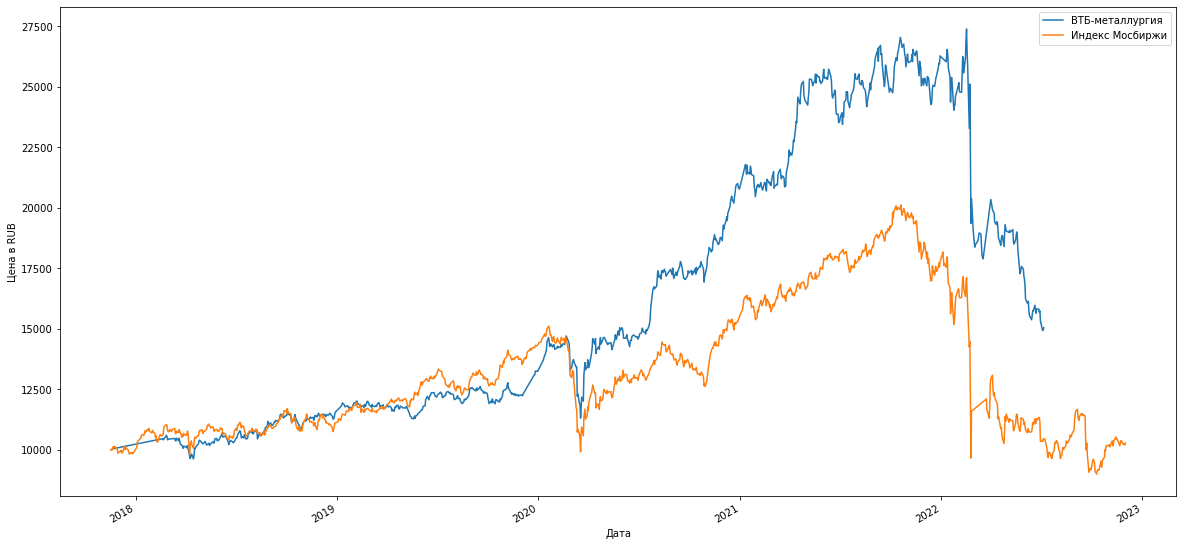

In [65]:
fig = plt.figure()
ax1 = fig.add_subplot(111,  ylabel='Цена в RUB',xlabel = 'Date')
VTB_met['В рублях'].plot(ax = ax1, label = 'ВТБ-металлургия')

IMOEX_vtb['В рублях'].plot(ax = ax1, label = 'Индекс Мосбиржи')
fig.set_figwidth(20)    
fig.set_figheight(10)
plt.legend(loc='best',fontsize = 'medium')
plt.show()

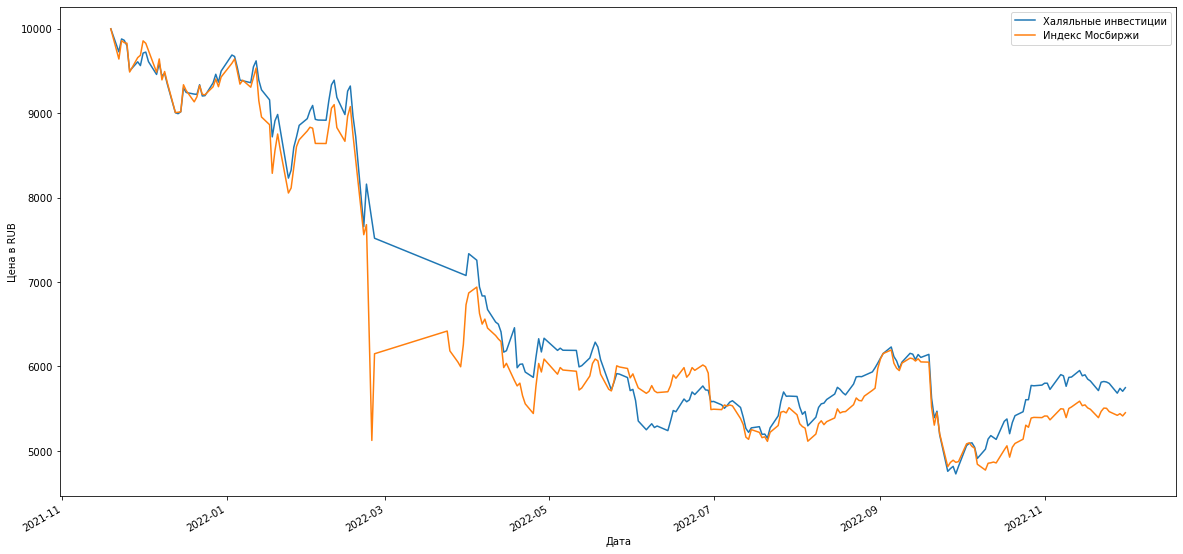

In [66]:
fig = plt.figure()
ax1 = fig.add_subplot(111,  ylabel='Цена в RUB',xlabel = 'Date')

halal['В рублях'].plot(ax = ax1, label = 'Халяльные инвестиции')
IMOEX_halal['В рублях'].plot(ax = ax1, label = 'Индекс Мосбиржи')
fig.set_figwidth(20)    
fig.set_figheight(10)
plt.legend(loc='best',fontsize = 'medium')
plt.show()


In [643]:
IMOEX_halal['В рублях']
IMOEX_vtb

Дата
2021-01-12    10000.000000
2021-01-13     8764.854305
2021-01-14     8816.858578
2021-01-15     8716.082934
2021-01-18     8769.046976
                  ...     
2022-12-05     5803.793104
2022-12-07     5389.274340
2022-12-08     5423.522904
2022-12-09     6187.094151
2022-12-10     4929.292878
Name: В рублях, Length: 461, dtype: float64

In [646]:
print(np.std(halal['В рублях'].pct_change()))
print(np.std(IMOEX_halal['В рублях'].pct_change()))

0.1664562778103967
0.12898506882316785


In [647]:
print(np.std(VTB_met['В рублях'].pct_change()))
print(np.std(IMOEX_vtb['В рублях'].pct_change()))

0.08143493973213335
0.08628466979330923


In [640]:
ts

,Равные веса MSCI,Капитализация,Равные веса IDB,Минимизация риска,Использование кластеров,Равные веса RobecoSAM,Nasdaq-100
0,10000.000000,10000.000000,10000.000000,9999.000000,10000.000000,10000.000000,10000.000000
1,9824.490589,9842.797339,9817.904148,9795.684023,9799.173351,9812.828090,9792.282718
2,9821.327643,9843.436121,9785.472876,9836.754902,9737.271458,9792.789407,9762.500695
3,9633.545079,9646.941231,9636.458730,9804.134640,9413.587413,9718.899981,9675.003245
4,9359.806322,9375.595338,9358.177659,9611.975087,9106.481633,9423.652685,9373.975831
...,...,...,...,...,...,...,...
1499,96548.711262,39213.007720,57096.009344,31204.872041,109356.567999,33494.683594,34648.301369
1500,101555.963726,40211.590328,59178.557175,31911.215255,116653.521721,33977.031624,35464.037112
1501,95868.151650,39391.554949,57008.591041,31818.783490,110578.027872,33282.522092,34537.356529
1502,94345.085473,39081.459081,56157.127081,31325.799561,109388.580651,33012.560223,34401.330411


In [539]:
plt.figure(figsize=(10,8))

plt.scatter(rs[0]*100,doh[0]*100,marker='.',label='Портфель с минимальным риском IDB',s =400)
plt.scatter(rs[1]*100,doh[1]*100,marker='.',label='Портфель основанный на капитализации',s =400)
plt.scatter(rs[2]*100,doh[2]*100,marker='.',label='Портфель с равными весами IDB',s =400)
plt.scatter(rs[3]*100,doh[3]*100,marker='.',label='Портфель с лучшими из кластеров IDB',s =400)
plt.scatter(rs[4]*100,doh[4]*100,marker='.',label='Портфель с равными весами MSCI',s =400)
plt.scatter(rs[5]*100,doh[5]*100,marker='.',label='Портфель с равными весами RobecoSam',s =400)
plt.scatter(rs[6]*100,doh[6]*100,marker='.',label='Nasdaq-100',s =400)
plt.xlabel('Риск, %')
plt.ylabel('Доходность, %')
plt.title("Облако портфелей")
plt.legend()

plt.show()


10000

In [67]:
full_ticker_data = pd.DataFrame()
def get_info_name(ticker_obj):
   info_keys = ['shortName']
   info_values = []
   for key in info_keys:
       info_values.append(ticker_obj.info.get(key, None))
   return dict(zip(info_keys, info_values))
for ticker in tqdm(tickers):
   try:
       ticker_obj = yf.Ticker(ticker)
       close_price = ticker_obj.history(start="2017-01-01", period='1m')['Close'].to_dict()
       info = get_info_name(ticker_obj)
       info.update(close_price)
       full_ticker_data.append(info)
   except:
       continue
        
full_ticker_df = pd.DataFrame(full_ticker_data)
full_ticker_df.loc[100:].drop(['industry','marketCap'],axis = 1).T

NameError: name 'tickers' is not defined